In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
from scipy import stats
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
warnings.filterwarnings('ignore')


# Current application

In [3]:
#Reading application.csv Data
df_application_data = pd.read_csv('application_data.csv')

df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Understanding the Data

In [4]:
#understanding info data.

In [5]:
df_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#understanding describe data.

In [7]:
df_application_data.describe().T

count           mean            std  \
SK_ID_CURR                    307511.0  278180.518577  102790.175348   
TARGET                        307511.0       0.080729       0.272419   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                   104582.0      12.061091      11.944812   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_1                  134133.0       0.502130       0.211062   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
APARTMENTS_AVG                151450.0       0.117440       0.108240   
BASEMENTAREA_AVG              127568.0       0.088442       0.082438   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
YEARS_BUILD_AVG               103023.0       0.752471       0.113280   
COMMONAREA_AVG                 92646.0       0.044621       0.076036   
ELEVATORS_AVG                 143620.0       0.078942       0.134576   
ENTRANCES_AVG                 152683.0       0.149725       0.100049   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
FLOORSMIN_AVG                  98869.0       0.231894       0.161380   
LANDAREA_AVG                  124921.0       0.066333       0.081184   
LIVINGAPARTMENTS_AVG           97312.0       0.100775       0.092576   
LIVINGAREA_AVG                153161.0       0.107399       0.110565   
NONLIVINGAPARTMENTS_AVG        93997.0       0.008809       0.047732   
NONLIVINGAREA_AVG             137829.0       0.028358       0.069523   
APARTMENTS_MODE               151450.0       0.114231       0.107936   
BASEMENTAREA_MODE             127568.0       0.087543       0.084307   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
YEARS_BUILD_MODE              103023.0       0.759637       0.110111   
COMMONAREA_MODE                92646.0       0.042553       0.074445   
ELEVATORS_MODE                143620.0       0.074490       0.132256   
ENTRANCES_MODE                152683.0       0.145193       0.100977   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
FLOORSMIN_MODE                 98869.0       0.228058       0.161160   
L

In [8]:
#understanding shape data.

In [9]:
df_application_data.shape

(307511, 122)

In [10]:
#understanding tail data.

In [11]:
df_application_data.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [12]:
#understanding dtype data.

In [13]:
variable = df_application_data
print(type(variable))


<class 'pandas.core.frame.DataFrame'>


In [14]:
#understanding columns data.

In [15]:
list(df_application_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [16]:
#understanding unique data.

In [17]:
my_list = ['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

unique_elements = list(set(my_list))

for item in unique_elements:
    print(item)


OBS_60_CNT_SOCIAL_CIRCLE
FLAG_DOCUMENT_13
REGION_RATING_CLIENT_W_CITY
AMT_REQ_CREDIT_BUREAU_YEAR
HOUR_APPR_PROCESS_START
OCCUPATION_TYPE
FLOORSMAX_MODE
NONLIVINGAPARTMENTS_MODE
FLAG_DOCUMENT_17
REG_REGION_NOT_WORK_REGION
NONLIVINGAPARTMENTS_MEDI
DAYS_EMPLOYED
COMMONAREA_MODE
ENTRANCES_MEDI
SK_ID_CURR
FLAG_DOCUMENT_2
AMT_GOODS_PRICE
FLAG_DOCUMENT_19
CNT_CHILDREN
DAYS_BIRTH
NAME_TYPE_SUITE
FLOORSMIN_MEDI
FONDKAPREMONT_MODE
NONLIVINGAREA_MODE
YEARS_BEGINEXPLUATATION_MEDI
FLAG_PHONE
CODE_GENDER
WEEKDAY_APPR_PROCESS_START
FLOORSMIN_MODE
FLAG_DOCUMENT_18
FLAG_MOBIL
FLAG_DOCUMENT_12
YEARS_BUILD_MODE
YEARS_BEGINEXPLUATATION_MODE
REG_CITY_NOT_LIVE_CITY
ELEVATORS_AVG
LIVINGAREA_MODE
YEARS_BUILD_MEDI
ORGANIZATION_TYPE
TARGET
DEF_30_CNT_SOCIAL_CIRCLE
FLAG_DOCUMENT_21
DEF_60_CNT_SOCIAL_CIRCLE
FLAG_DOCUMENT_7
FLAG_DOCUMENT_6
WALLSMATERIAL_MODE
NONLIVINGAREA_AVG
FLAG_DOCUMENT_15
APARTMENTS_MODE
EMERGENCYSTATE_MODE
FLAG_DOCUMENT_11
DAYS_REGISTRATION
BASEMENTAREA_AVG
LIVINGAPARTMENTS_MEDI
FLAG_DOCUMENT

In [18]:
#understanding nunique data.

In [19]:
my_list = ['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

num_unique = len(set(my_list))

print("Number of unique elements:", num_unique)

Number of unique elements: 122


In [20]:
# understanding value_counts data

In [21]:
# Sample data as a Pandas Series
data = pd.Series(['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR'])

# Use value_counts to count unique values
value_counts_result = data.value_counts()

# Print the result
print(value_counts_result)

SK_ID_CURR                      1
OBS_30_CNT_SOCIAL_CIRCLE        1
WALLSMATERIAL_MODE              1
TOTALAREA_MODE                  1
HOUSETYPE_MODE                  1
FONDKAPREMONT_MODE              1
NONLIVINGAREA_MEDI              1
NONLIVINGAPARTMENTS_MEDI        1
LIVINGAREA_MEDI                 1
LIVINGAPARTMENTS_MEDI           1
LANDAREA_MEDI                   1
FLOORSMIN_MEDI                  1
FLOORSMAX_MEDI                  1
ENTRANCES_MEDI                  1
ELEVATORS_MEDI                  1
COMMONAREA_MEDI                 1
YEARS_BUILD_MEDI                1
YEARS_BEGINEXPLUATATION_MEDI    1
BASEMENTAREA_MEDI               1
APARTMENTS_MEDI                 1
NONLIVINGAREA_MODE              1
NONLIVINGAPARTMENTS_MODE        1
LIVINGAREA_MODE                 1
LIVINGAPARTMENTS_MODE           1
LANDAREA_MODE                   1
FLOORSMIN_MODE                  1
FLOORSMAX_MODE                  1
ENTRANCES_MODE                  1
ELEVATORS_MODE                  1
EMERGENCYSTATE

# Missing Values

1. Find the percentage of Missing Values in DataFrame

In [22]:
# Count missing values column wise
df_application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [23]:
# List the columns having more than 50% missing values
cols_50_percent_missing_values = (df_application_data.columns[(round(100*(df_application_data.isnull().sum()/len(df_application_data.index)), 2)) >= 50]).tolist()
cols_50_percent_missing_values

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [24]:
# Delete the columns having more than 50% missing values
df_application_data = df_application_data.drop(cols_50_percent_missing_values,axis=1)

In [25]:
df_application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [26]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(df_application_data[df_application_data.isnull().sum(axis=1) > (len(df_application_data.columns)//2)].index)

0

In [27]:
# Percent of missing values in columns
(round(100*(df_application_data.isnull().sum()/len(df_application_data.index)),2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [28]:
# Count the rows for which EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
len(df_application_data[np.isnan(df_application_data['EXT_SOURCE_2']) & np.isnan(df_application_data['EXT_SOURCE_3'])])

230

In [29]:
# As there are only 230 such records we can delete those.
# Note:- As we have total 307511 records deleting only 230 records will not affect our further analysis
df_application_data = df_application_data[(~(np.isnan(df_application_data['EXT_SOURCE_2']) & np.isnan(df_application_data['EXT_SOURCE_3'])))]

In [30]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 column 
round(df_application_data.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

EXT_SOURCE_2  EXT_SOURCE_3
count    306851.000    246546.000
mean          0.514         0.511
std           0.191         0.195
min           0.000         0.001
25%           0.392         0.371
50%           0.566         0.535
75%           0.664         0.669
max           0.855         0.896

We can see that the difference between mean and median is quite narrow for both the columns. Also, the variation from 25th to 75th percentile is equally distributed. Thus, let's impute the missing values by the mean value of EXT_SOURCE_2 and EXT_SOURCE_3 respectively.

In [31]:
# Imputing EXT_SOURCE_2 and EXT_SOURCE_3 by mean values
df_application_data.loc[np.isnan(df_application_data['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = df_application_data['EXT_SOURCE_2'].mean()
df_application_data.loc[np.isnan(df_application_data['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = df_application_data['EXT_SOURCE_3'].mean()


In [32]:
(round(100*(df_application_data.isnull().sum()/len(df_application_data.index)),2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [33]:
# Treating missing values in AMT_GOODS_PRICE
df_application_data['AMT_GOODS_PRICE'].describe().apply(lambda x: '%.2f' % x)

count     307004.00
mean      538484.20
std       369486.08
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

<Axes: >

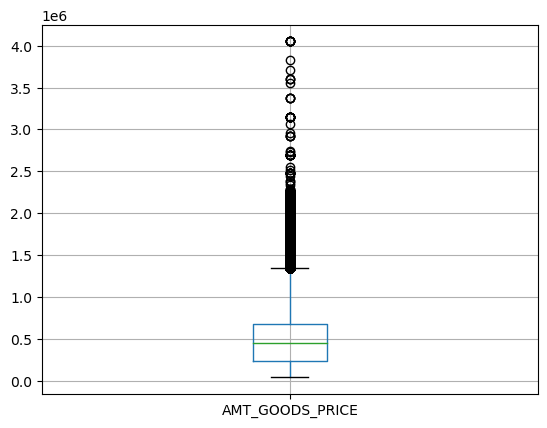

In [34]:
df_application_data.boxplot(column =['AMT_GOODS_PRICE']) 

We see the standard deviation of `AMT_GOODS_PRICE` is very high. Also there are good amount of outliers in the colum as well.
So, imputing missing values with mean or median will be biased in this case.
Hence, it is better to remove the rows with missing `AMT_GOODS_PRICE`. Infact these rows are only 0.09% of the whole records.

In [35]:
df_application_data = df_application_data[~np.isnan(df_application_data['AMT_GOODS_PRICE'])]

In [36]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT 
df_application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265662.000000
mean          0.265552
std           0.794315
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

This is an integer type variable, and thus have values 0, 1, 2 etc. We cannot impute the NaNs by the mean or the median (1.53 enquires does not make sense!).
Thus, we need to impute them by the mode - the most common occurring value if that approach is feasible.

In [37]:
# converting AMT_REQ_CREDIT_BUREAU_QRT to type 'category'
df_application_data['AMT_REQ_CREDIT_BUREAU_QRT'] = df_application_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

# displaying frequencies of each category
df_application_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215133
1.0       33836
2.0       14393
3.0        1716
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

The most common value of ```AMT_REQ_CREDIT_BUREAU_QRT``` is 0, so let's impute the NaNs by that.

In [38]:
# Imputing AMT_REQ_CREDIT_BUREAU_QRT with 0
df_application_data.loc[pd.isnull(df_application_data['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [39]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
df_application_data = df_application_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [40]:
(round(100*(df_application_data.isnull().sum()/len(df_application_data.index)),2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.00
NAME_TYPE_SUITE                  0.33
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [41]:
df_application_data.shape

(307004, 76)

In [42]:
# Percentage of rows lost
(100 - 100*(len(df_application_data.index)/307511))

0.16487215091493113

In [43]:
# Calculate the percentage of missing values for each column
missing_percentage = (df_application_data.isnull().mean() * 100).round(1)

# Create a DataFrame to display the result
result_df = pd.DataFrame({
    'ColName': missing_percentage.index,
    'Missing %age': missing_percentage.values
})

# Print the result
print(result_df)

                         ColName  Missing %age
0                     SK_ID_CURR           0.0
1                         TARGET           0.0
2             NAME_CONTRACT_TYPE           0.0
3                    CODE_GENDER           0.0
4                   FLAG_OWN_CAR           0.0
5                FLAG_OWN_REALTY           0.0
6                   CNT_CHILDREN           0.0
7               AMT_INCOME_TOTAL           0.0
8                     AMT_CREDIT           0.0
9                    AMT_ANNUITY           0.0
10               AMT_GOODS_PRICE           0.0
11               NAME_TYPE_SUITE           0.3
12              NAME_INCOME_TYPE           0.0
13           NAME_EDUCATION_TYPE           0.0
14            NAME_FAMILY_STATUS           0.0
15             NAME_HOUSING_TYPE           0.0
16    REGION_POPULATION_RELATIVE           0.0
17                    DAYS_BIRTH           0.0
18                 DAYS_EMPLOYED           0.0
19             DAYS_REGISTRATION           0.0
20           

2. Remove Columns with High Missing %age .

Drop all columns whose missing %age > 50% .

In [44]:
emptycol=df_application_data.isnull().sum()
emptycol=emptycol[emptycol.values>(0.5*len(emptycol))]
len(emptycol)

14

In [45]:
# Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.5].index)
df_application_data.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

14


In [46]:
# Checking the columns having less null percentage

df_application_data.isnull().sum()/len(df_application_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003909
AMT_GOODS_PRICE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000


In [47]:
# Filling missing values with median

values=df_application_data['AMT_ANNUITY'].median()

df_application_data.loc[df_application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [48]:
# Filling missing values with median

values=df_application_data['CNT_FAM_MEMBERS'].median()

df_application_data.loc[df_application_data['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=values

In [49]:
# Searching for the column for null values

df_application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

3. Find 5 Columns whose Missing value %age is < 13%

In [50]:
# Calculate missing value percentages for each column
missing_percentages = (df_application_data.isnull().mean() * 100).round(2)

# Filter the columns with missing percentages less than 13%
selected_columns = missing_percentages[missing_percentages < 13]

# Print the 5 columns with the lowest missing percentages
print("Columns with Missing %age < 13%:")
print(selected_columns.head(5))

Columns with Missing %age < 13%:
SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
dtype: float64


In [51]:

# Calculate missing value percentages for each column
missing_percentages = (df_application_data.isnull().mean() * 100).round(2)

# Filter the columns with missing percentages less than 13%
selected_columns = missing_percentages[missing_percentages < 13]

# Print the 5 columns with the lowest missing percentages
print("Columns with Missing %age < 13%:")
print(selected_columns)

# Suggest imputation metric for each selected column
imputation_suggestions = {}
for column in selected_columns.index:
    suggestion = "No missing values to impute"
    imputation_suggestions[column] = suggestion



Columns with Missing %age < 13%:
SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT  

### In this code, we first create a sample DataFrame with missing values in various columns. Then, we specify a threshold (13%) for the maximum allowed missing percentage. We calculate the missing percentage for each column, filter the columns with missing percentages less than or equal to the threshold, and print these selected columns. Finally, for each of the selected columns, we provide a suggestion for the best imputation metric based on the missing percentage. The suggestion is either "mode" (most frequent value) or "mean, median" depending on the level of missingness.

4. Check the datatypes of all the columns and change the Datatype also check anomalies like negative age in data.

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [52]:
# For Gender column

df_application_data[df_application_data['CODE_GENDER']=='XNA'].shape

(4, 62)

In [53]:
# For Organization column

df_application_data[df_application_data['NAME_CONTRACT_TYPE']=='XNA'].shape

(0, 62)

In [54]:
# Describing the Gender column to check the number of females and males

df_application_data['CODE_GENDER'].value_counts()

F      202073
M      104927
XNA         4
Name: CODE_GENDER, dtype: int64

In [55]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

df_application_data.loc[df_application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df_application_data['CODE_GENDER'].value_counts()

F    202077
M    104927
Name: CODE_GENDER, dtype: int64

In [56]:
# Describing the organization type column

df_application_data['NAME_CONTRACT_TYPE'].describe()

count         307004
unique             2
top       Cash loans
freq          278025
Name: NAME_CONTRACT_TYPE, dtype: object

In [57]:
df_application_data=df_application_data.drop(df_application_data.loc[df_application_data['NAME_CONTRACT_TYPE']=='XNA'].index)
df_application_data[df_application_data['NAME_CONTRACT_TYPE']=='XNA'].shape

(0, 62)

In [58]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df_application_data[numeric_columns]=df_application_data[numeric_columns].apply(pd.to_numeric)
df_application_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461           -637            -3648.0            -2120           1   
1      -16765          -1188            -1186.0             -291           1   
2      -19046           -225            -4260.0            -2531           1   
3      -19005          -3039            -9833.0            -2437           1   
4      -19932          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                         

In [59]:

# Check data types of all columns
print("Initial Data Types:")
print(df_application_data.dtypes)

# Correct negative values in numeric columns
numeric_columns = df_application_data.select_dtypes(include=[pd.np.number]).columns
for column in numeric_columns:
    df_application_data[column] = df_application_data[column].abs()


# Check data types after conversion and correction
print("\nData Types After Conversion and Correction:")
print(df_application_data.dtypes)

# Print the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_application_data)

Initial Data Types:
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE          

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Converting DAYS_BIRTH column into AGE column for readablity and analysis

In [60]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
df_application_data['AGE'] = abs(df_application_data['DAYS_BIRTH']//365)

In [61]:
# Drop 'DAYS_BIRTH' column
df_application_data = df_application_data.drop(['DAYS_BIRTH'],axis=1)

Converting DAYS_EMPLOYED column into YEARS_EMPLOYED column for readablity and analysis

In [62]:
# Divide 'DAYS_EMPLOYED' by 365 for YEAR_EMPLOYED
df_application_data['YEARS_EMPLOYED'] = abs(df_application_data['DAYS_EMPLOYED']//365)

In [63]:
# Drop 'DAYS_EMPLOYED' column
df_application_data = df_application_data.drop(['DAYS_EMPLOYED'],axis=1)

In [64]:
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4             

In [65]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in col_list_outlier: 
    q1 = df_application_data[col].quantile(0.25)
    q3 = df_application_data[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_data = df_application_data.loc[(df_application_data[col] > range_low) & (df_application_data[col] < range_high)]

df_application_data.shape

(275995, 62)

5. Find 5 Columns where you identified Presence of Outliers.

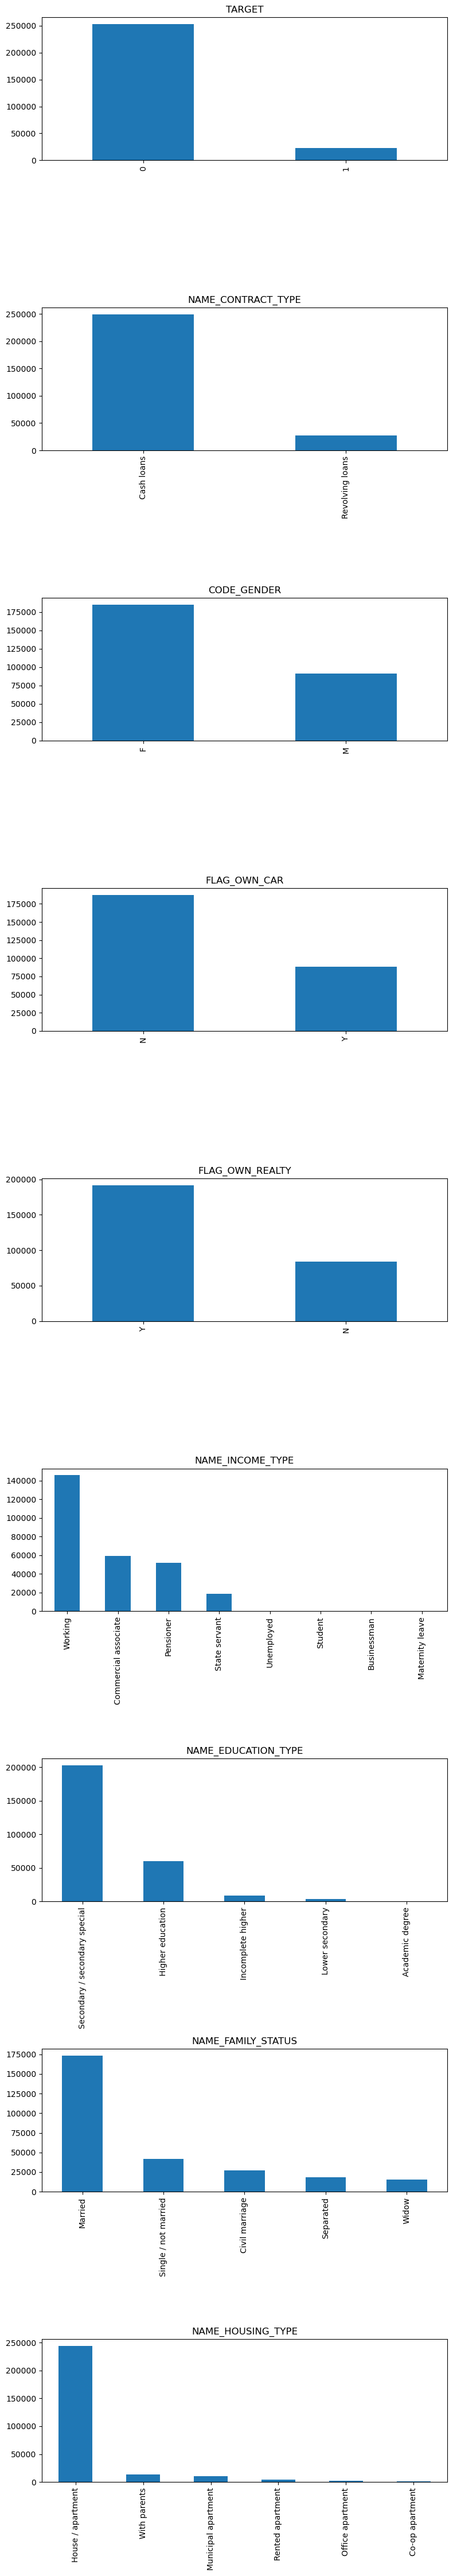

In [66]:
# Define the list of columns to plot
col_list = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Create subplots for each column
fig, axes = plt.subplots(len(col_list), 1, figsize=(8, 5 * len(col_list)))

# Plot each column as a bar plot
for i, col in enumerate(col_list):
    df_application_data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# Adjust the layout
plt.tight_layout()
plt.show()


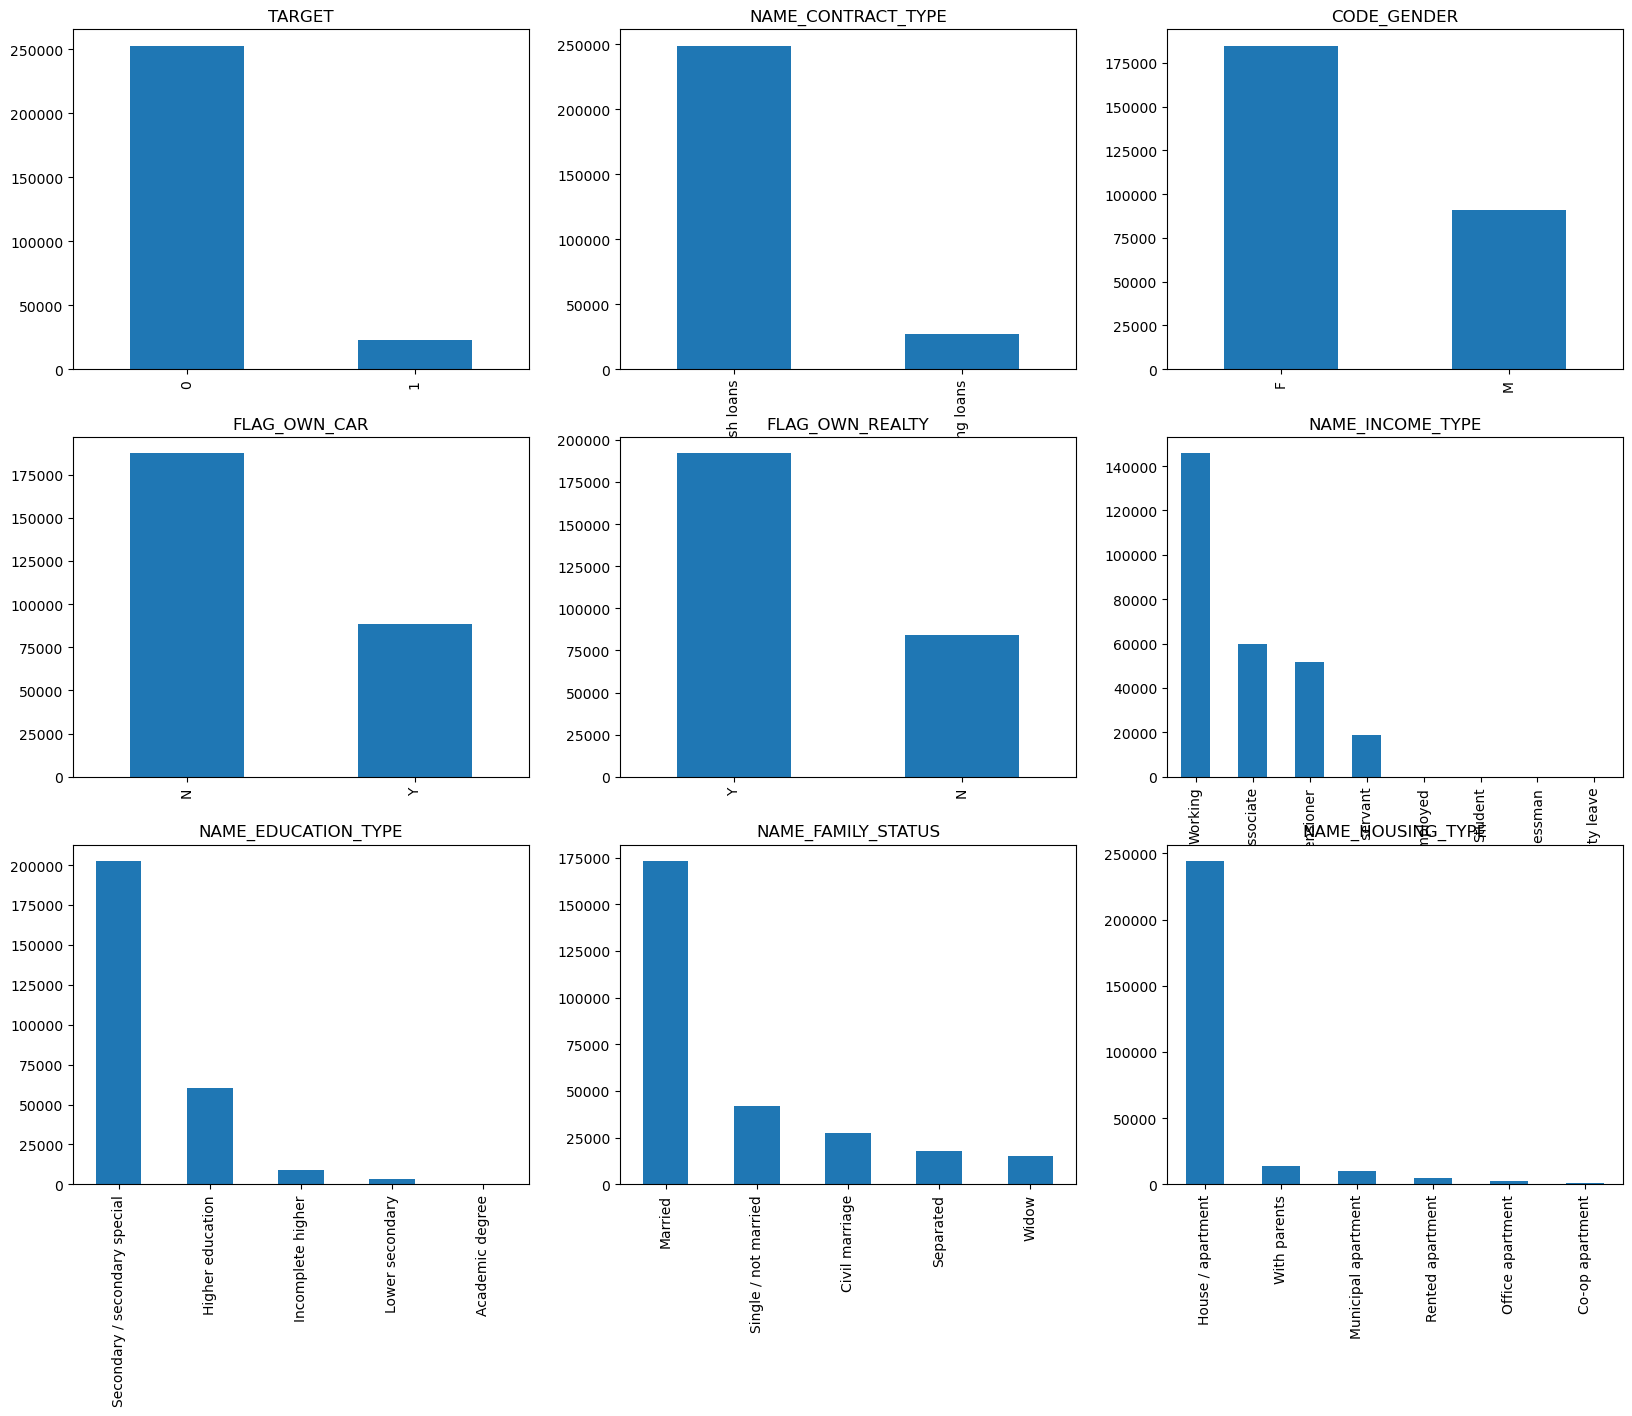

In [67]:
# Listing columns for checking data imbalance and plotting them
k=0
plt.figure(figsize=(20,15))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    df_application_data[col].value_counts().plot(kind='bar');
    plt.title(col)

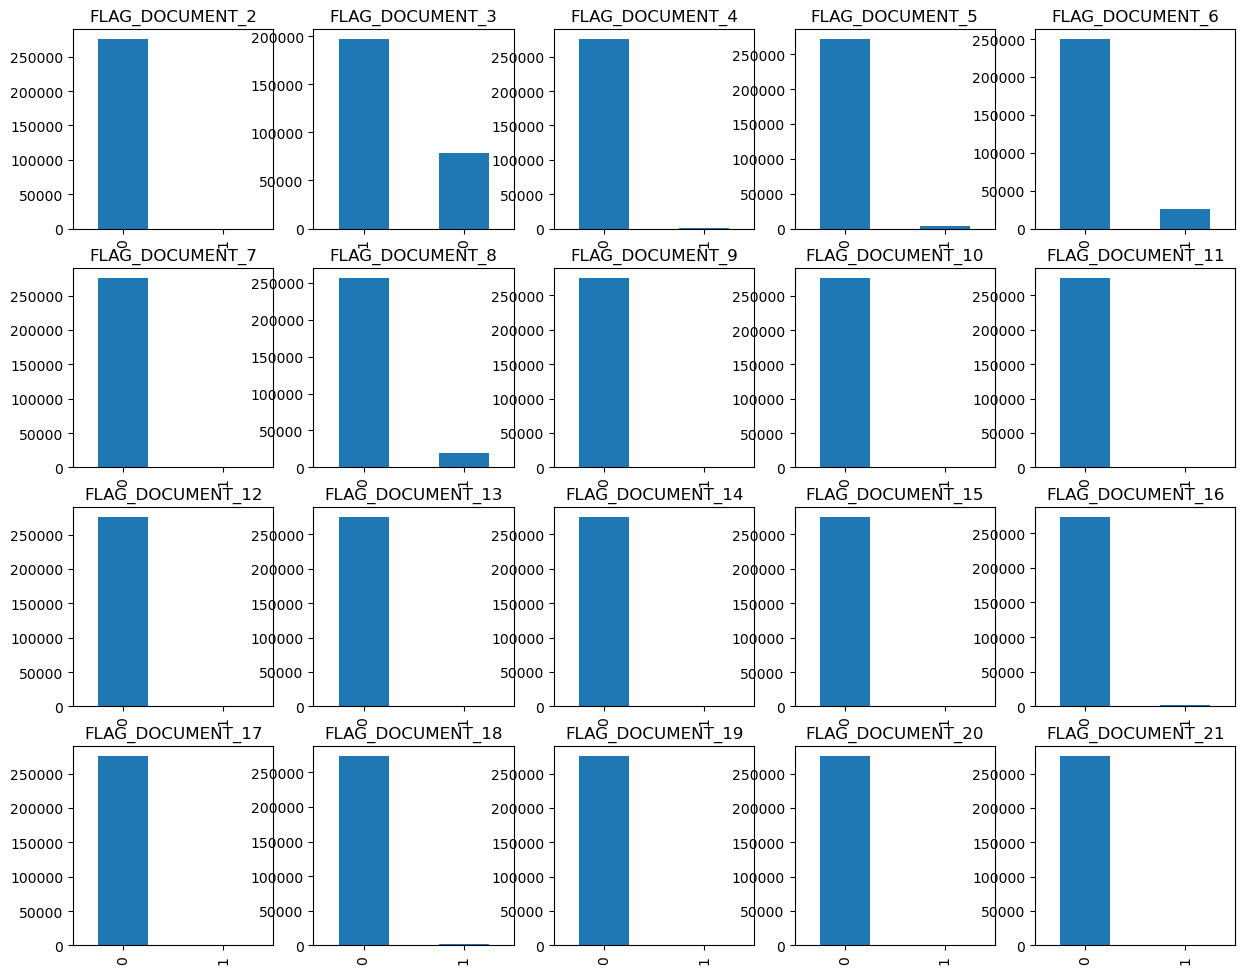

In [68]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    df_application_data[col_name].value_counts().plot(kind='bar');
    plt.title(col_name)

As we can see that except FLAG_DOCUMENT_3 all the columns have negligible count of 1s. So we are removing all the FLAG_DOCUMENT columns except FLAG_DOCUMENT_3

In [69]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
df_application_data.drop('FLAG_DOCUMENT_2',axis=1,inplace=True)
for i in range(4,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    df_application_data.drop(col,axis=1,inplace=True)

 6 Next you need to Find 2 Columns for Binning and Do the Binning.

In [70]:
df_application_data['AGE'].describe()

count    275995.000000
mean         43.435146
std          12.117292
min          20.000000
25%          33.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [71]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [72]:
#Creating new column AGE_GROUP
df_application_data['AGE_GROUP'] = df_application_data['AGE'].apply(age_group)


In [73]:
df_application_data.shape

(275995, 44)

In [74]:
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4             

#### Creating three credit amount groups - High, medium and low

In [75]:
round(df_application_data['AMT_CREDIT'].describe(),2)

count     275995.00
mean      530092.92
std       318164.82
min        45000.00
25%       269550.00
50%       472500.00
75%       753840.00
max      1558813.50
Name: AMT_CREDIT, dtype: float64

In [76]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [77]:
#Creating new column AGE_GROUP
df_application_data['CREDIT_GROUP'] = df_application_data['AMT_CREDIT'].apply(credit_group)
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4             

#### Creating three income groups - Hign, medium and Low

In [78]:
df_application_data['AMT_INCOME_TOTAL'].describe()

count    275995.000000
mean     149866.575054
std       61031.740844
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      180000.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [79]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [80]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
df_application_data['INCOME_GROUP'] = df_application_data['AMT_INCOME_TOTAL'].apply(income_group)
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4             

In [81]:
df_application_data['EXT_SOURCE_SCORE'] = round(((df_application_data['EXT_SOURCE_2'] + df_application_data['EXT_SOURCE_3'])/2),2)
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4             

In [82]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
df_application_data.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

#### Creating three External source score groups - High, Medium and Low

In [83]:
df_application_data['EXT_SOURCE_SCORE'].describe()

count    275995.000000
mean          0.508588
std           0.135915
min           0.000000
25%           0.420000
50%           0.520000
75%           0.610000
max           0.840000
Name: EXT_SOURCE_SCORE, dtype: float64

In [84]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

In [85]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
df_application_data['EXT_SCORE_CATEGORY'] = df_application_data['EXT_SOURCE_SCORE'].apply(ext_source_group)
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                0                 1           1           0              1.0   
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4             

In [86]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
df_application_data = df_application_data[~(df_application_data['CODE_GENDER'] == 'XNA')]

### Divide data into two sets 
##### Client with payment difficulties (Target=1) 
##### All other cases (Target=0) 

In [87]:
# Client with payment difficulties (Target=1)
df_current_target_1 = df_application_data[df_application_data['TARGET'] == 1]
df_current_target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0              3648.0             2120           1               1   
26             6573.0             1827           1               1   
40             1182.0             1029           1               1   
42               45.0             4409           1               1   
81             5391.0             4199           1               0   

    FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0                 0                 1           1           0   
26                0                 1           0           0   
40                0                 1           0           0   
42                1                 1           1           0   
81                0                 1           0           0   

    CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0               1.0                     2                            2   
26              1.0                     3                            2   
40              2.0                     2                            2   
42              2.0                     3                            3   
81              2.0                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0             

In [88]:
# Client with all other cases (Target=0)
df_current_target_0 = df_application_data[df_application_data['TARGET'] == 0]
df_current_target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   
5             4970.0              477           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
1                0                 1           1           0              2.0   
2                1                 1           1           0              1.0   
3                0                 1           0           0              2.0   
4                0                 1           0           0              1.0   
5                1                 1           1           0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5             

In [89]:
df_current_target_0.shape

(252883, 46)

In [90]:
df_current_target_1.shape

(23112, 46)

In [91]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(df_current_target_0)/len(df_current_target_1),2)

10.94

# Analysis
Univariate analysis for Unordered categorical variables.

Count of defaulters and non-defaulters on the basis of gender.

[Text(0.5, 0, 'Gender')]

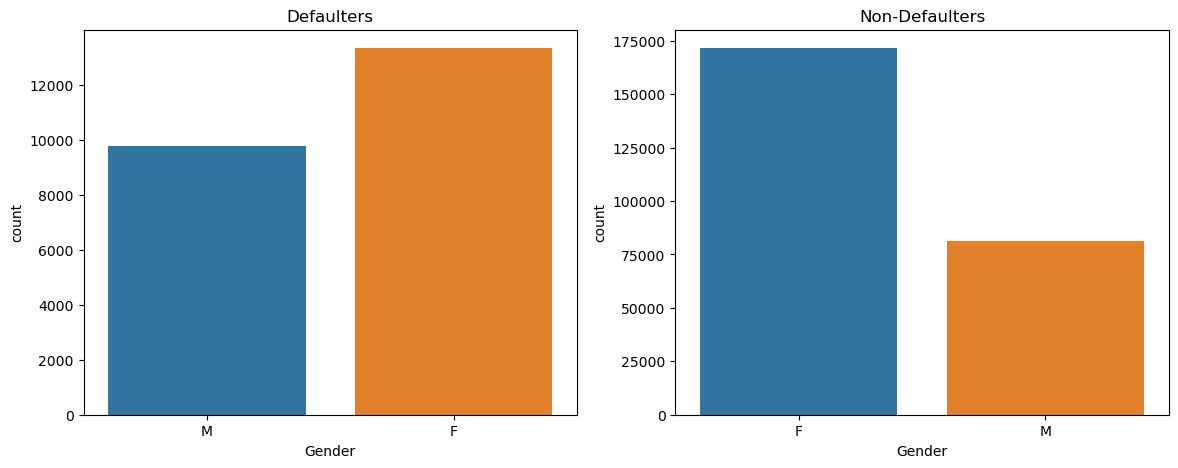

In [92]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

#### Analysis
 
Defaluters - We can see that females are slightly more in number of defaulters than male.

Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male.

#### Defaulters and non-defaulters on the basis of Loan type

[Text(0.5, 0, 'Loan type')]

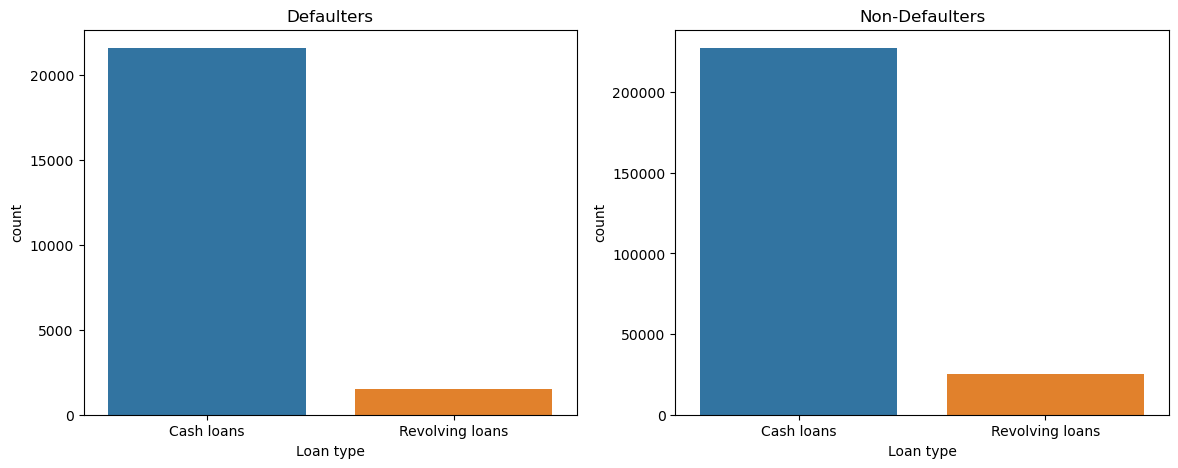

In [93]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

##### Analysis
We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#### Defaulters and non-defaulters on the basis of Income type

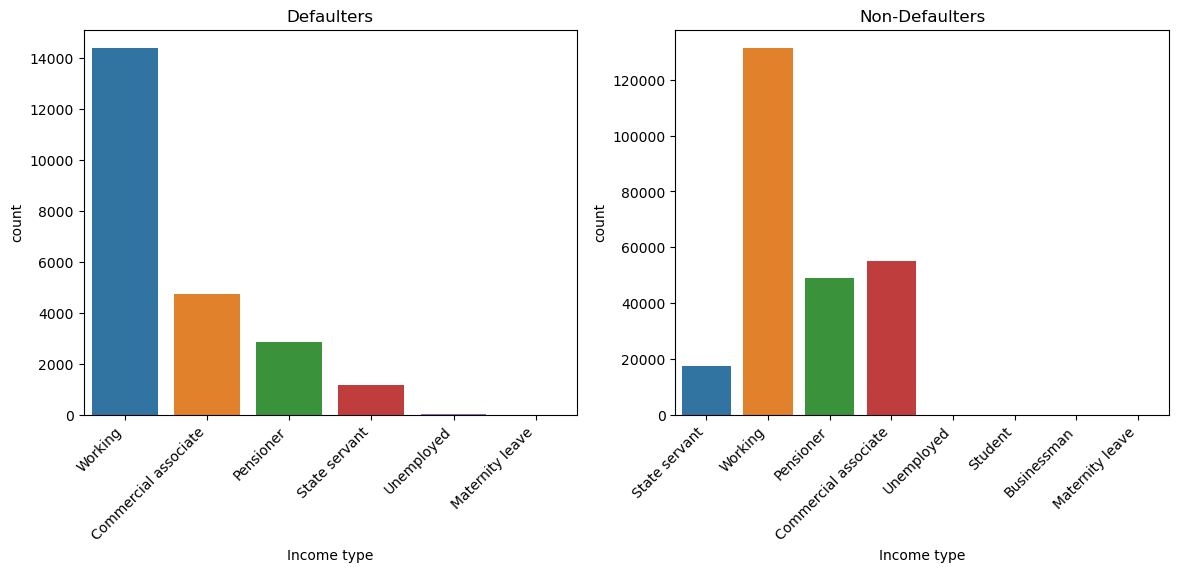

In [94]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Analysis
1. **Defaulters** - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
2. **Non-defaulters** - Similarly here also working people are more in number who are not defaulted

#### Defaulters and non-defaulters on the basis of Education type

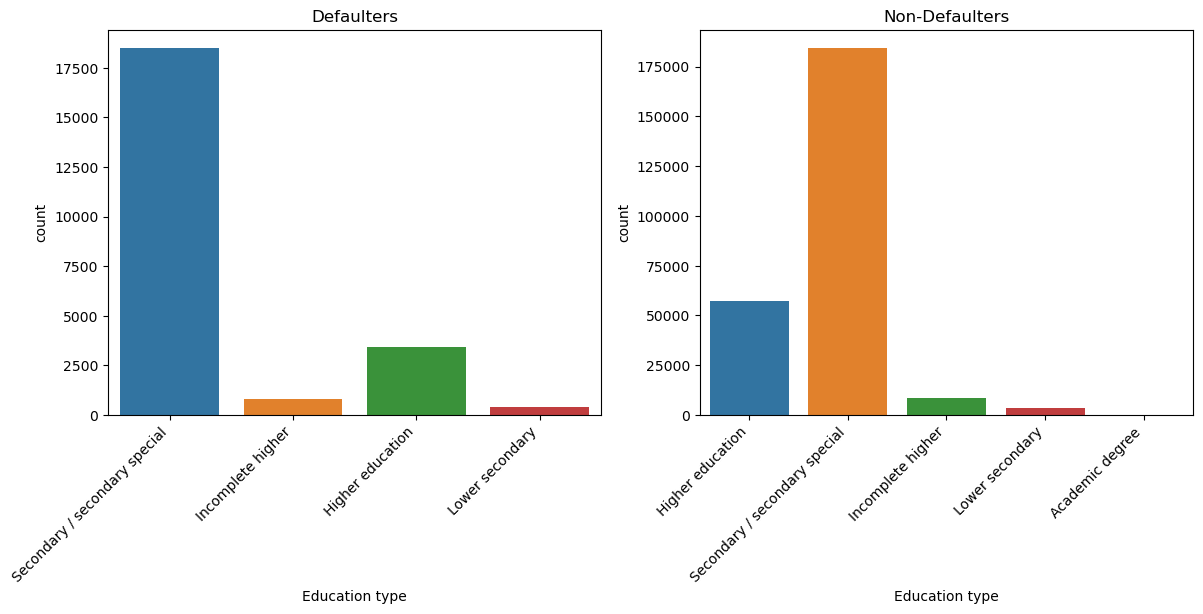

In [95]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. **Defaulters** - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.
2. **Non defaulters** - Here also Secondary/Secondary sepcial are more in numbers.

#### Defaulters and non-defaulters on the basis of Family status

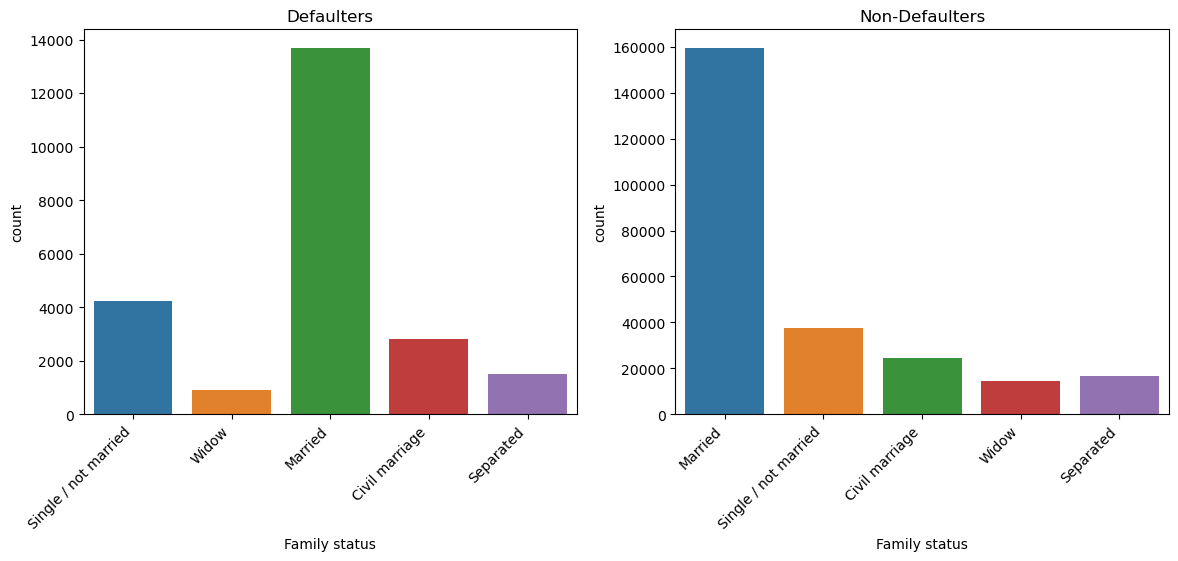

In [96]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

### Univariate analysis for continious variables

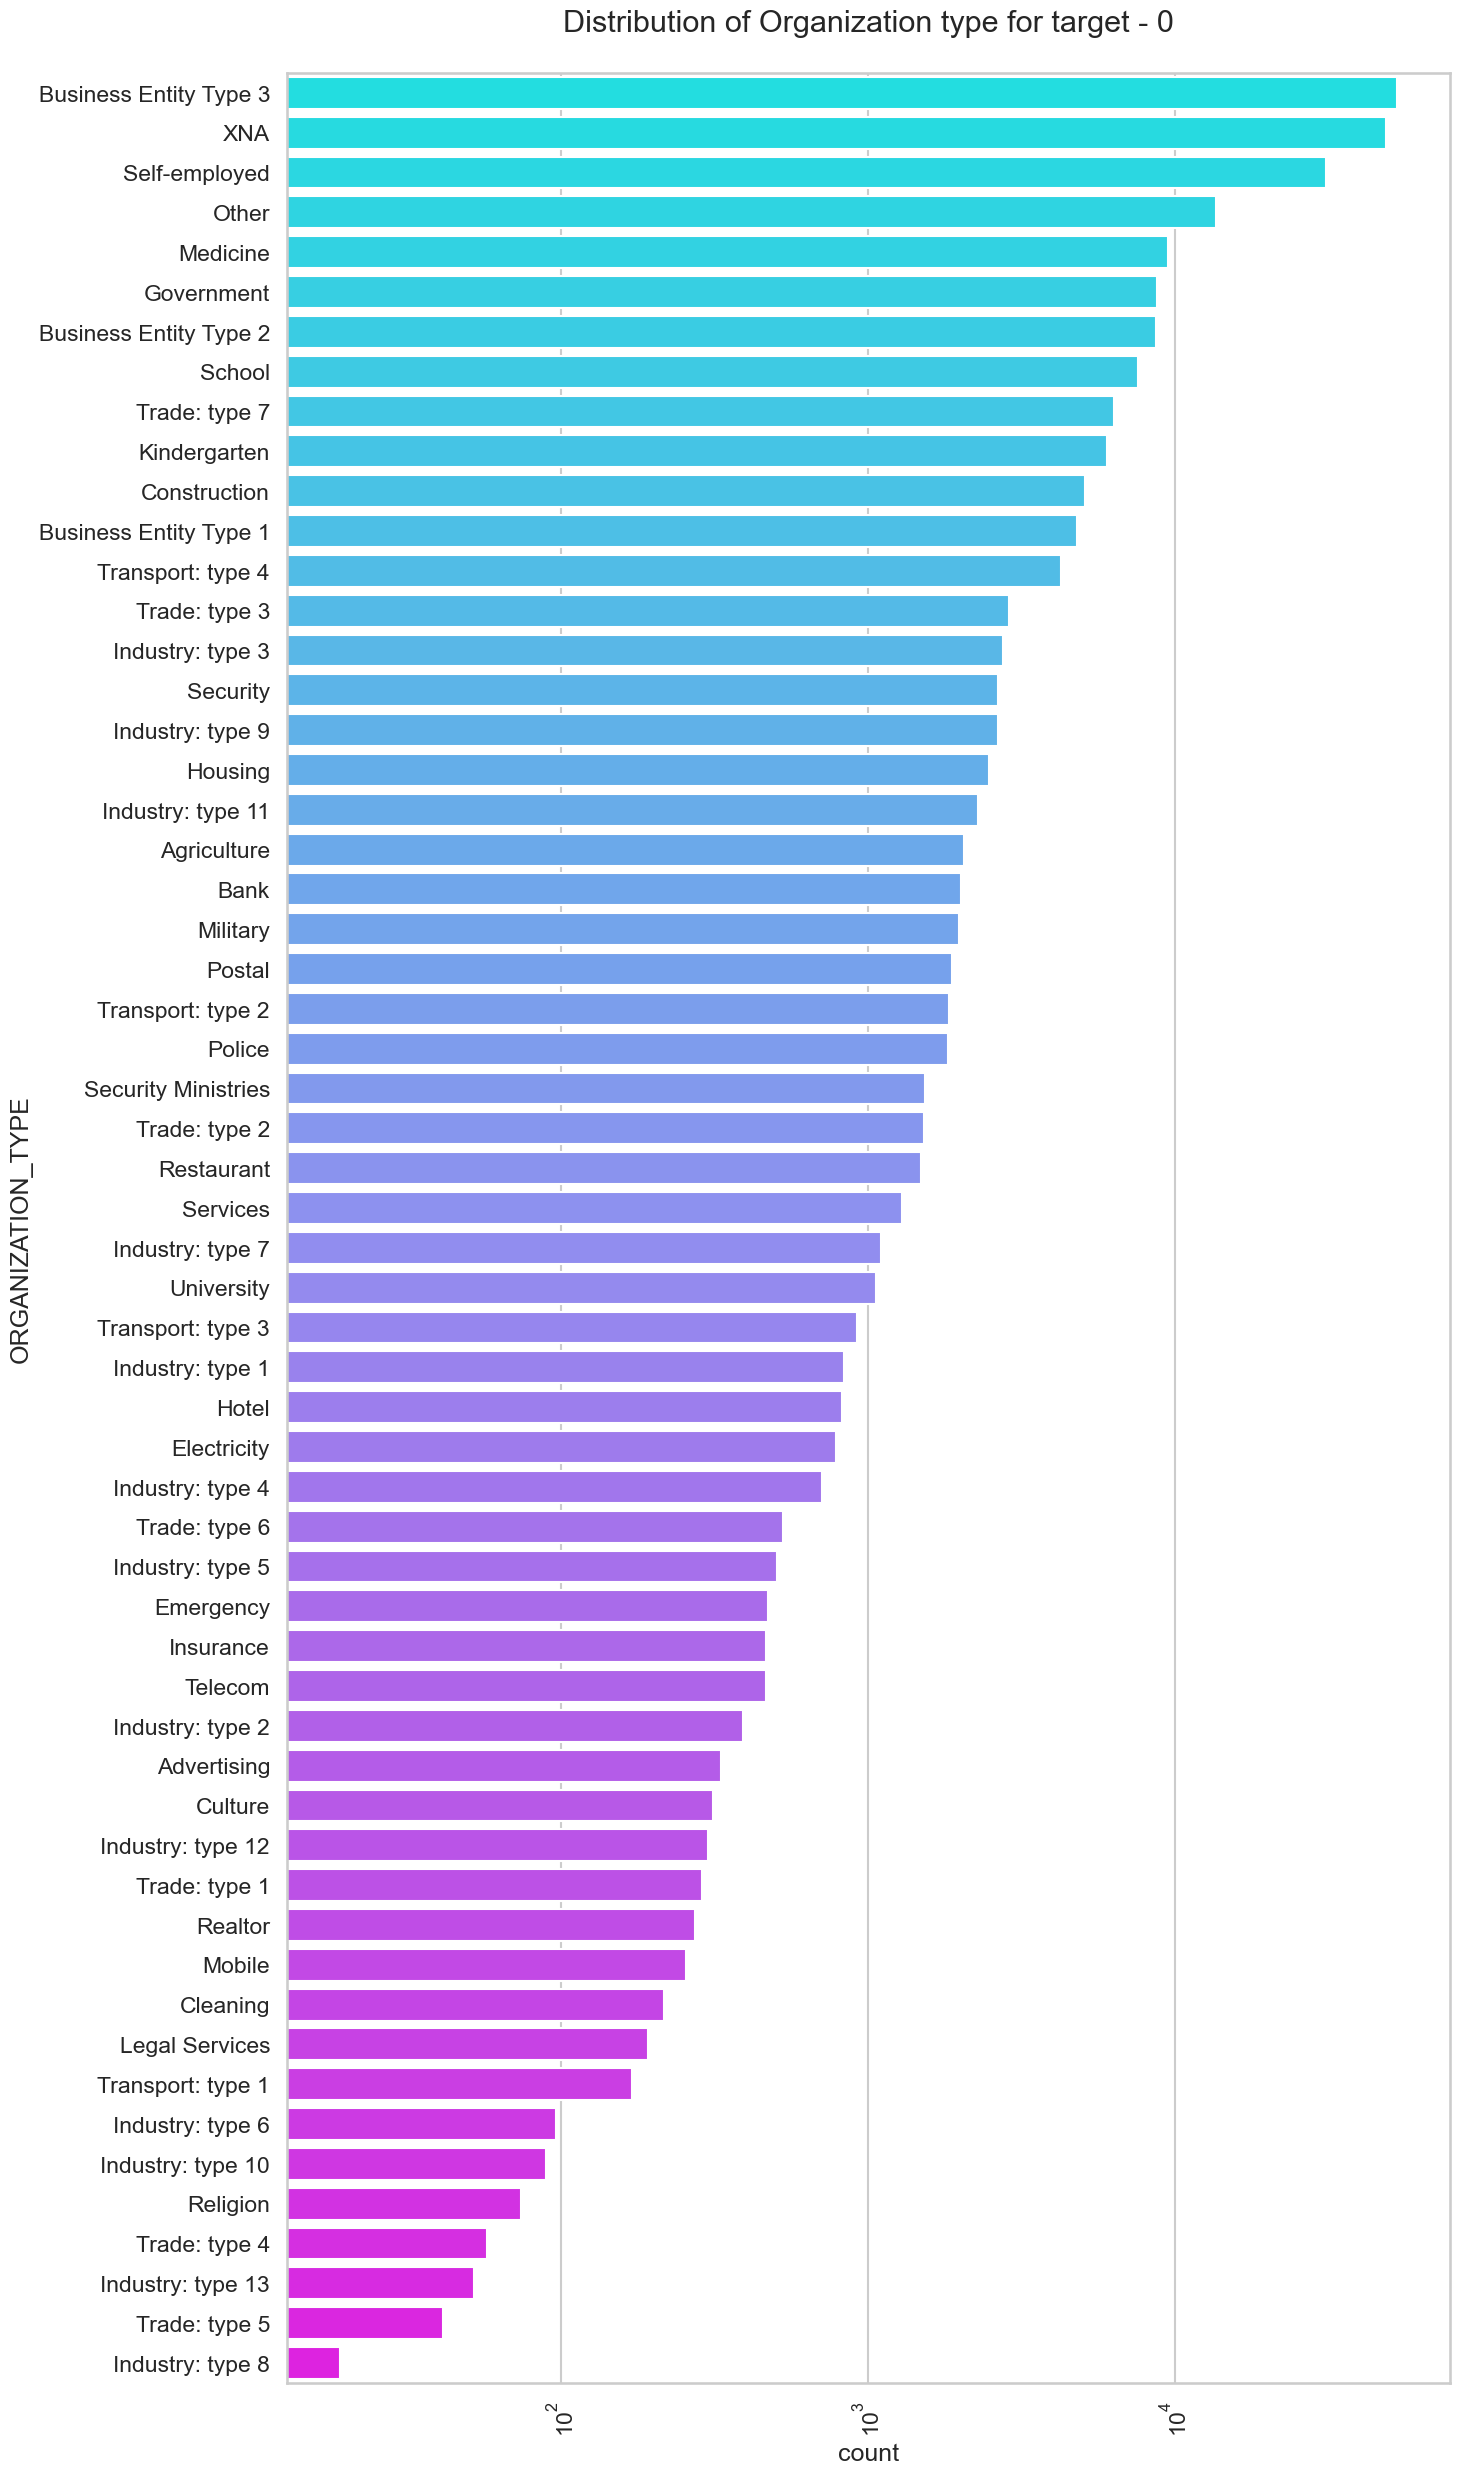

In [97]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df_current_target_0,y='ORGANIZATION_TYPE',order=df_current_target_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


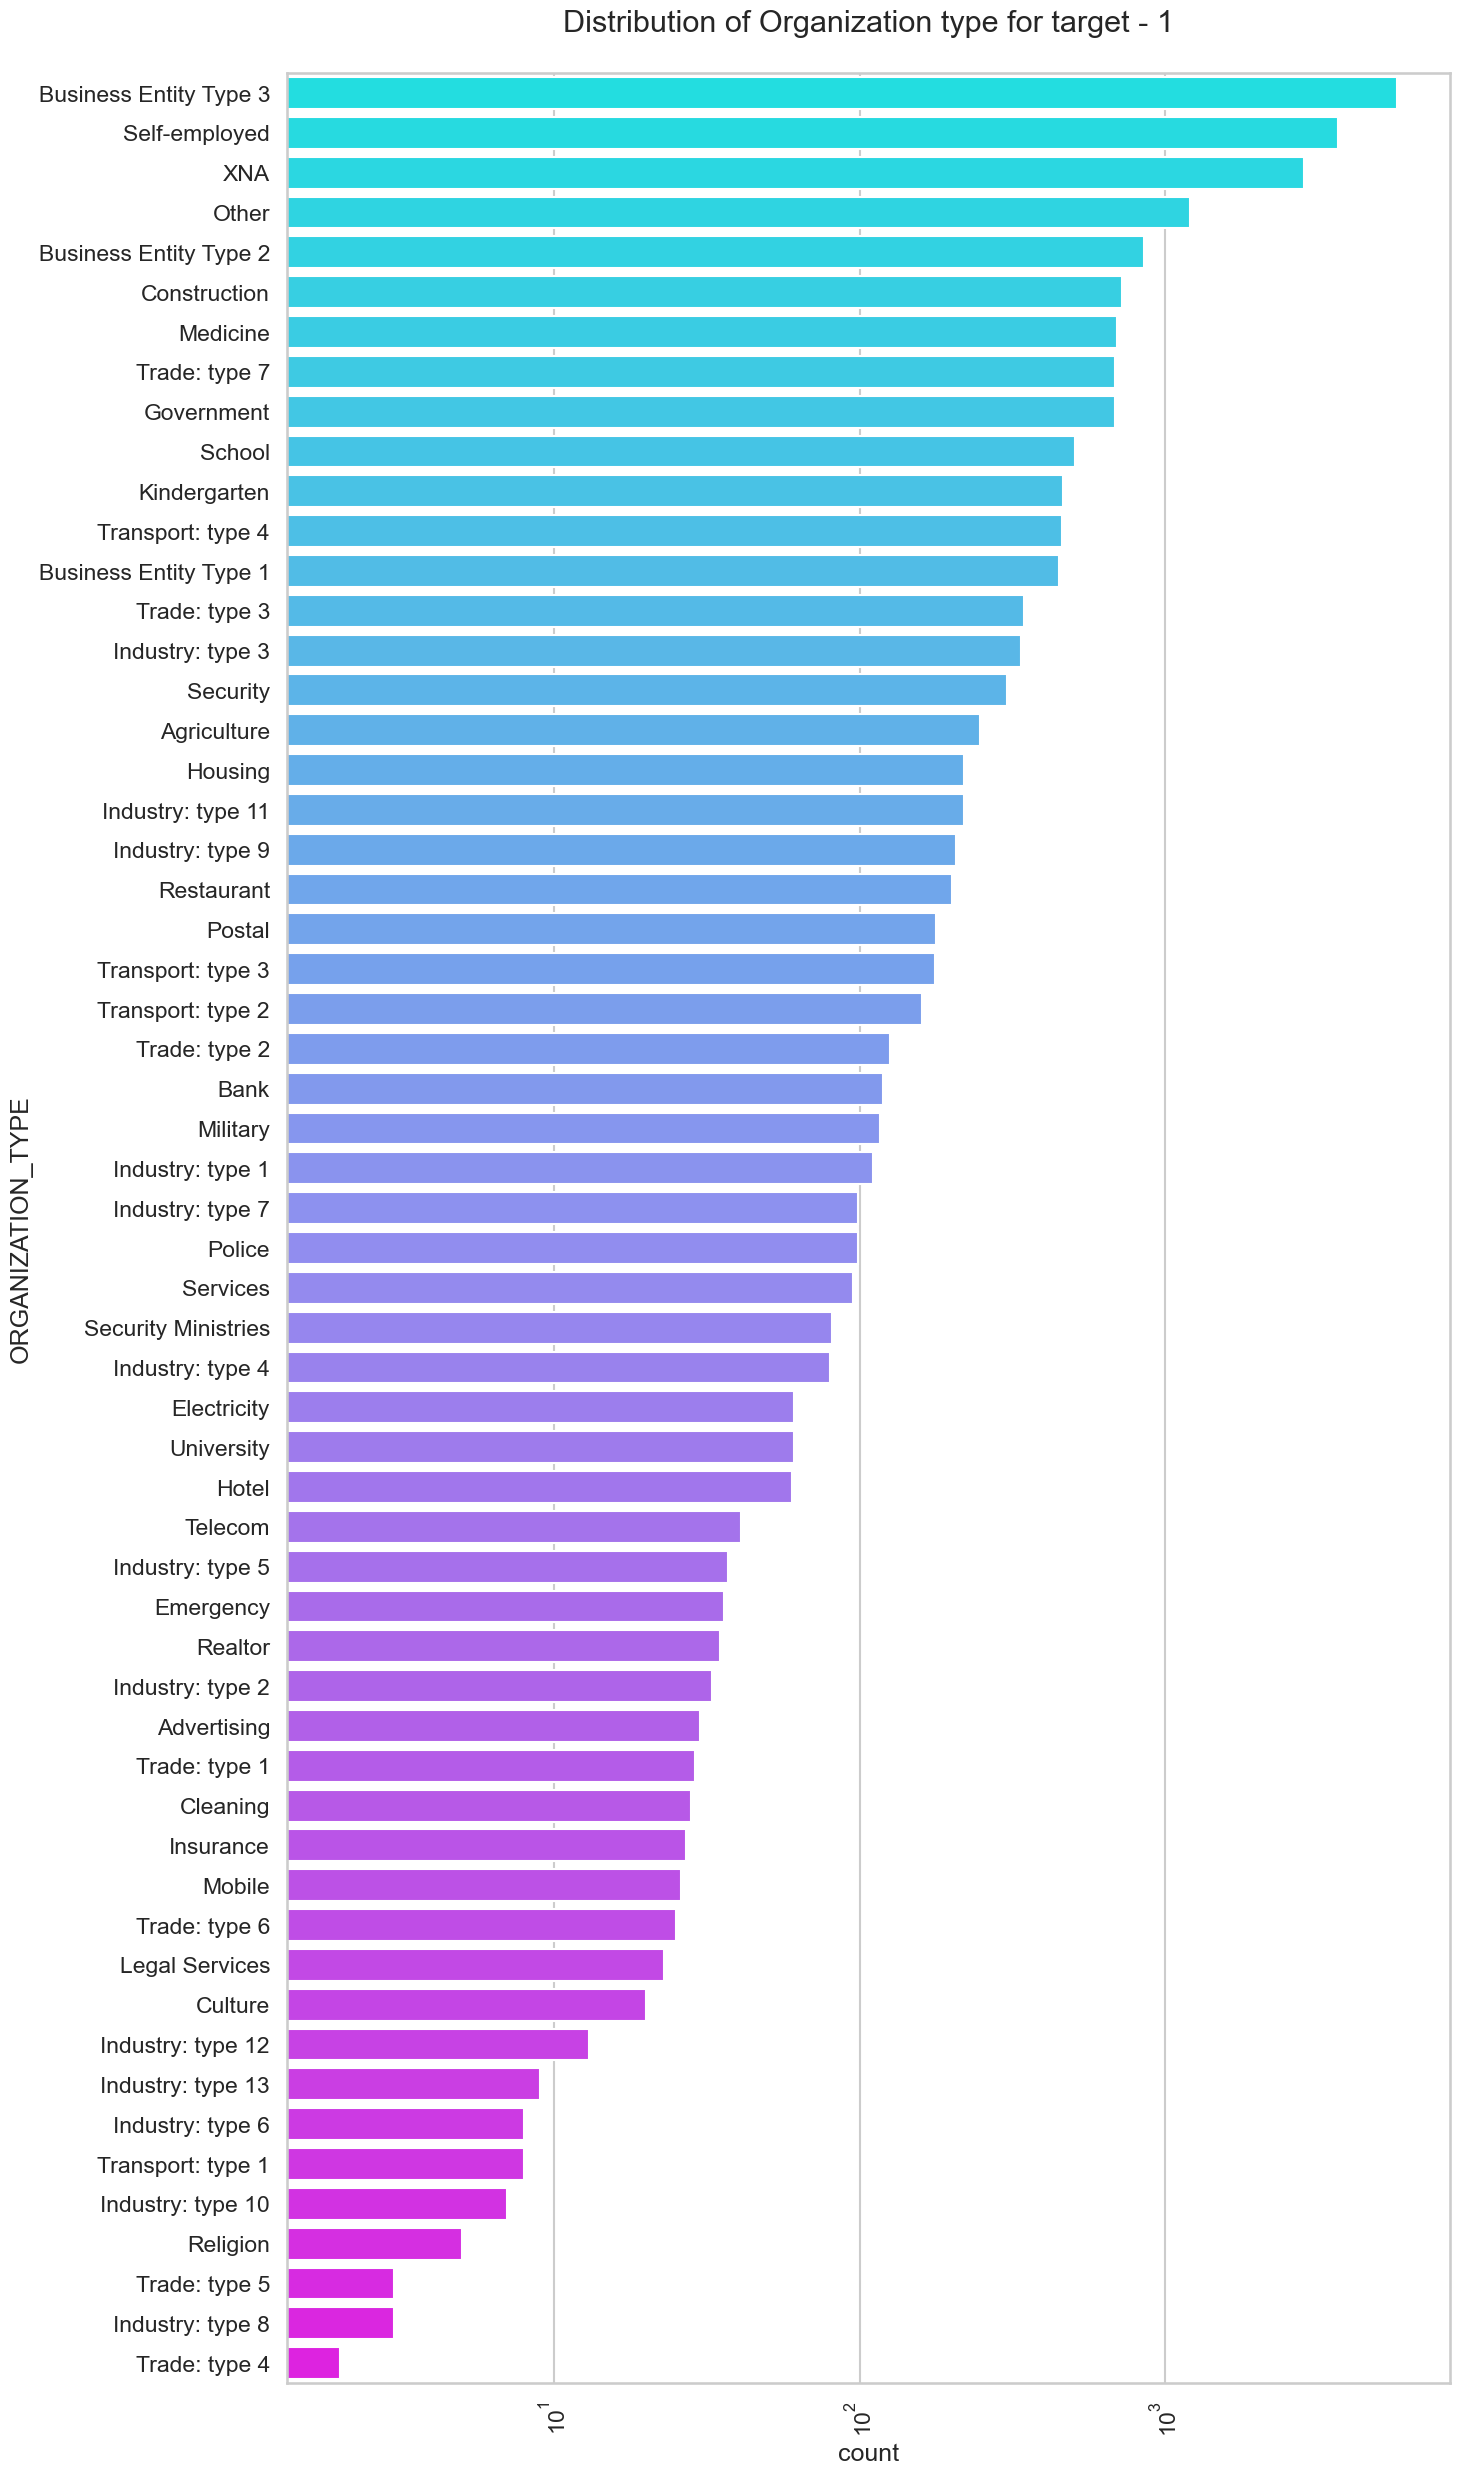

In [98]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df_current_target_1,y='ORGANIZATION_TYPE',order=df_current_target_1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.
3. Same as type 0 in distribution of organization type.


#### Defaulters and non-defaulters on the basis of credit amount of the loan

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

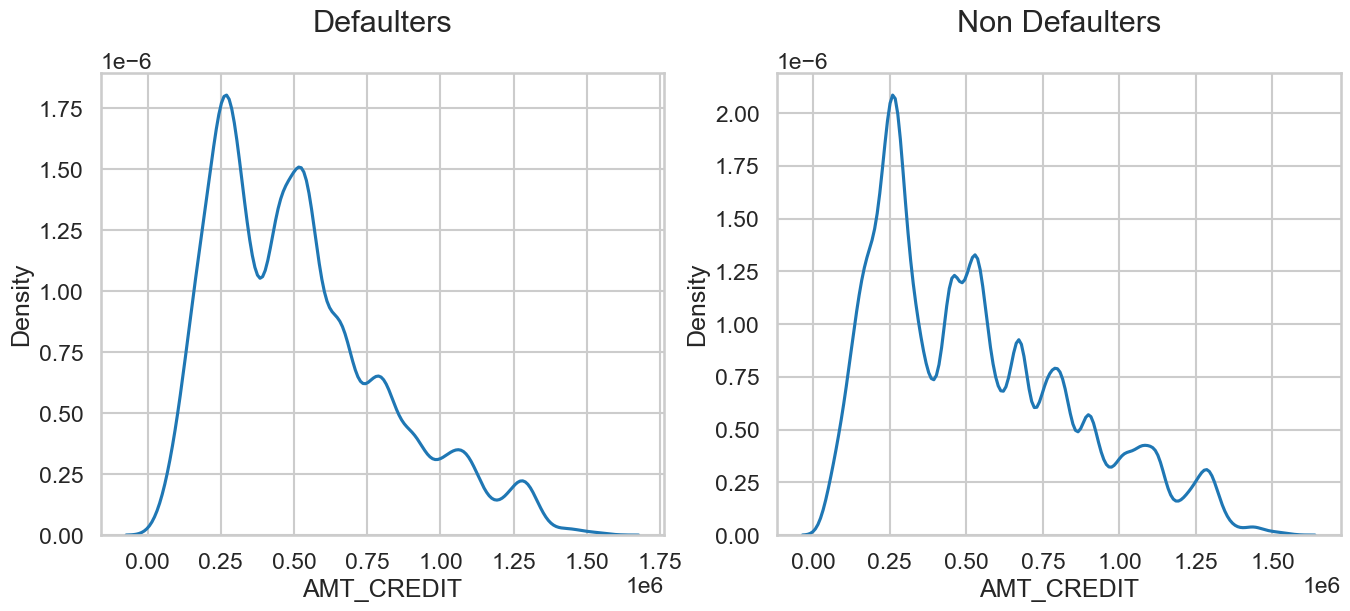

In [99]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_CREDIT'],hist=False)

#### Defaulters and non-defaulters on the basis of gender and their total income

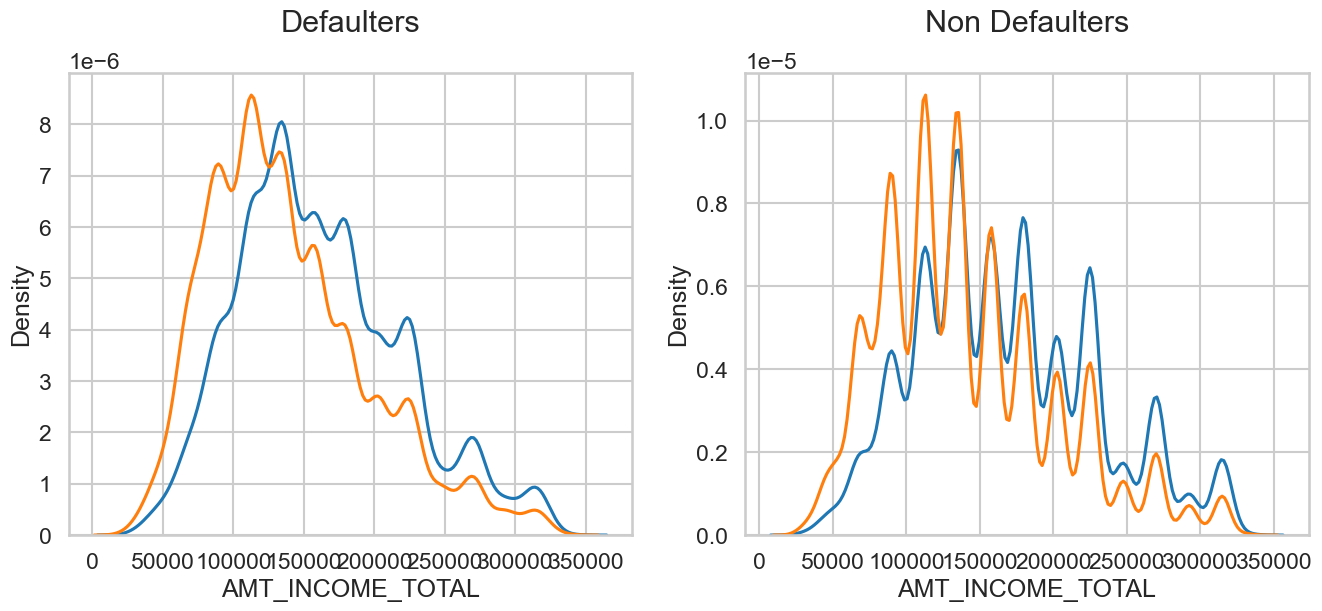

In [100]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = df_current_target_1[df_current_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.subplot(1,2,2) 
plt.title('Non Defaulters')
for i in gender:
    subset = df_current_target_0[df_current_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    

#### Defaulters and non-defaulters on the basis of Loan annuity

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

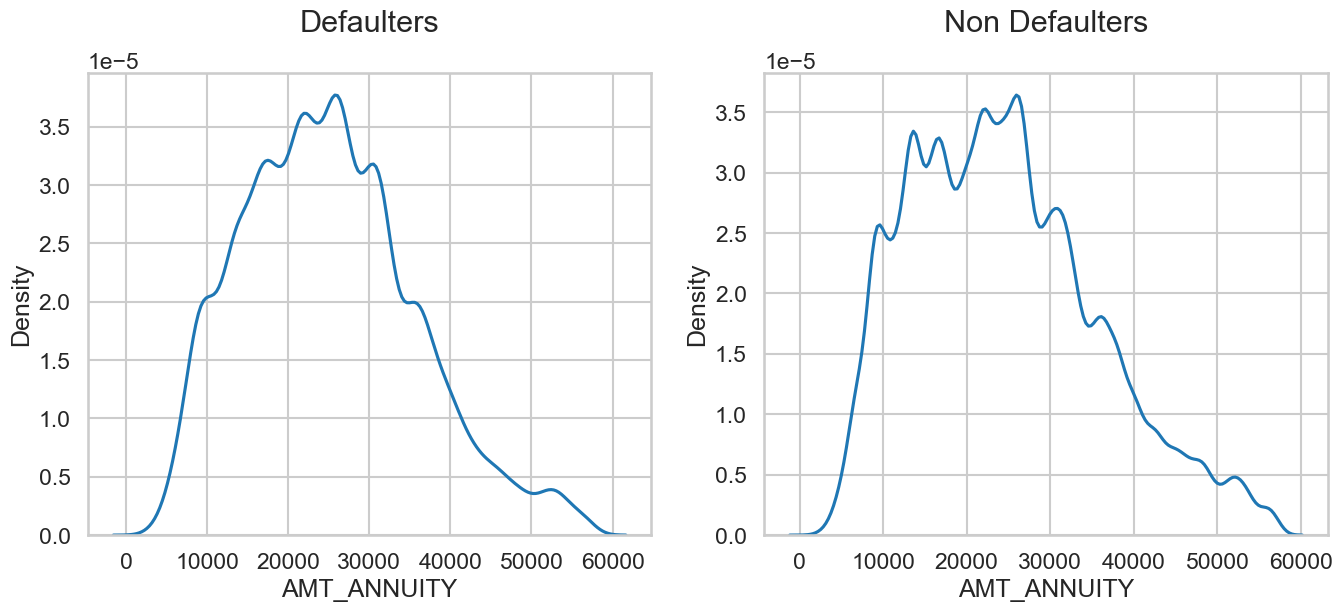

In [101]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_ANNUITY'],hist=False)

##### Analysis
We can notice from the above distribution plot that in both the cases the loan annuity is concentrated more from 10000 to 40000. 

### Segmented Univariate analysis for ordered categorical variables

#### Percentage of age group applicants defaulted and not defaulted
The analysis below showed that the how much percentage of each age group(Young, Mid age and Senior citizen) applicants are defaulted and not defaulted.

In [102]:
# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(df_application_data[(df_application_data['AGE_GROUP'] == 'Young') & (df_application_data['TARGET'] == 1)])/len(df_application_data[df_application_data['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(df_application_data[(df_application_data['AGE_GROUP'] == 'Mid Age') & (df_application_data['TARGET'] == 1)])/len(df_application_data[df_application_data['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(df_application_data[(df_application_data['AGE_GROUP'] == 'Senior') & (df_application_data['TARGET'] == 1)])/len(df_application_data[df_application_data['AGE_GROUP'] == 'Senior']),2)

In [103]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

AGE_GROUP  Percentage
0     Young       10.65
1   Mid Age        7.22
2    Senior        4.96

In [104]:
# Taking the percentage of each age group who was not defaulted.
# Divide each non defaulted age group count by total count of that age group
young_0 = round(100*len(df_application_data[(df_application_data['AGE_GROUP'] == 'Young') & (df_application_data['TARGET'] == 1)])/len(df_application_data[df_application_data['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(df_application_data[(df_application_data['AGE_GROUP'] == 'Mid Age') & (df_application_data['TARGET'] == 1)])/len(df_application_data[df_application_data['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(df_application_data[(df_application_data['AGE_GROUP'] == 'Senior') & (df_application_data['TARGET'] == 1)])/len(df_application_data[df_application_data['AGE_GROUP'] == 'Senior']),2)

In [105]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_nondefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

AGE_GROUP  Percentage
0     Young       10.65
1   Mid Age        7.22
2    Senior        4.96

Text(0.5, 1.0, 'Non-Defaulters')

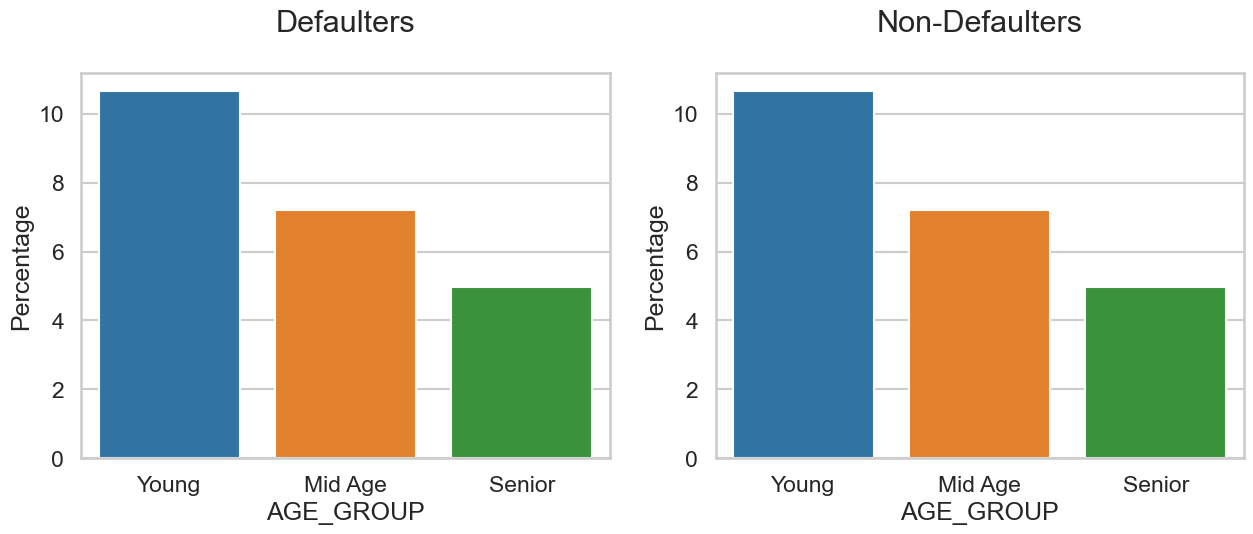

In [106]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_nondefault)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - We see that Young people are more likely to default than other two age groups. Whereas, Senior citizens are less likely to default than others.
2. **Non defaulters** - There is not much difference in the likeli defaulters in the age groups.

#### Credit amount group

Text(0.5, 1.0, 'Non-Defaulters')

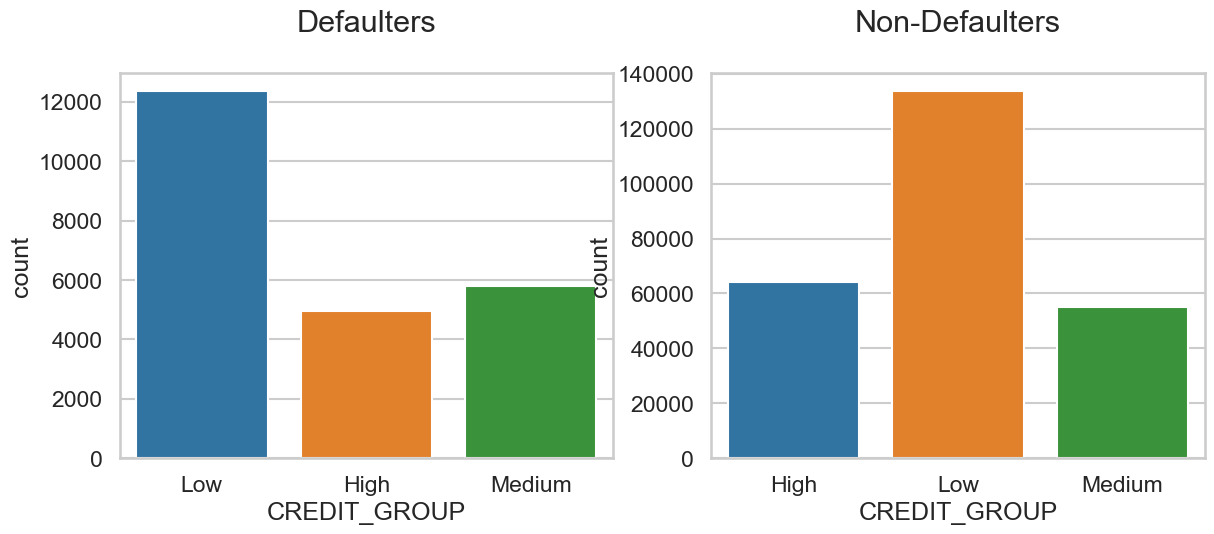

In [107]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - Surprisingly low credited amount groups are more defaulters.
2. **Non defaulters** - As expected low credit amount groups are more in number, who were not defaulted.

#### Income group

Text(0.5, 1.0, 'Non-Defaulters')

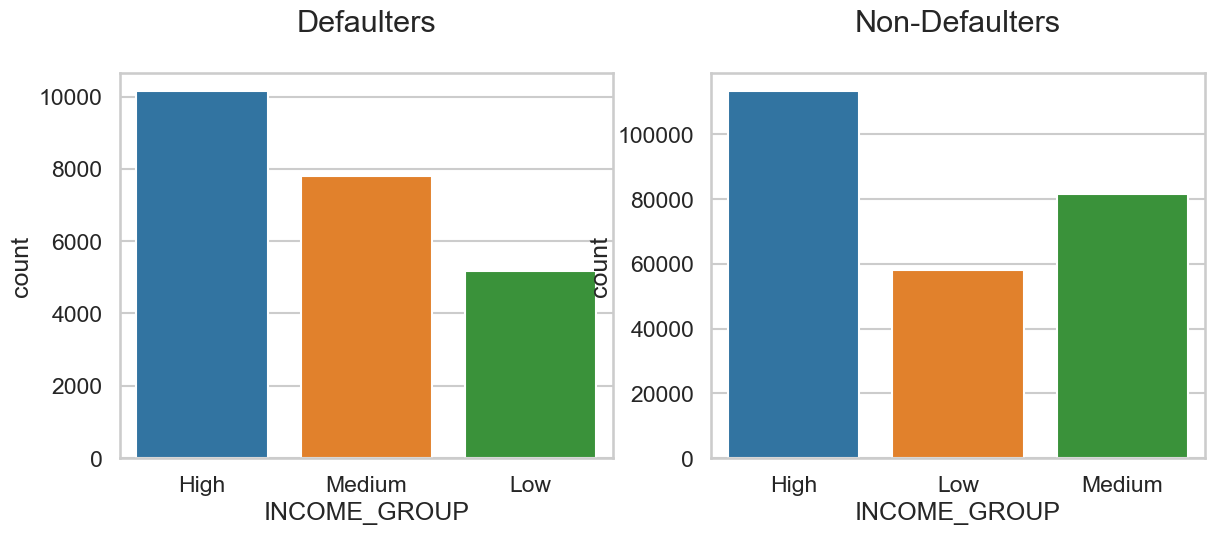

In [108]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - Surprisingly the High income group is more in number to be defaulted, then Medium and then Low.
2. **Non defaulters** - Here as expected the count of non defaulters more in High income group and less in low income group.

#### Normalized score from external data source

Text(0.5, 1.0, 'Non-Defaulters')

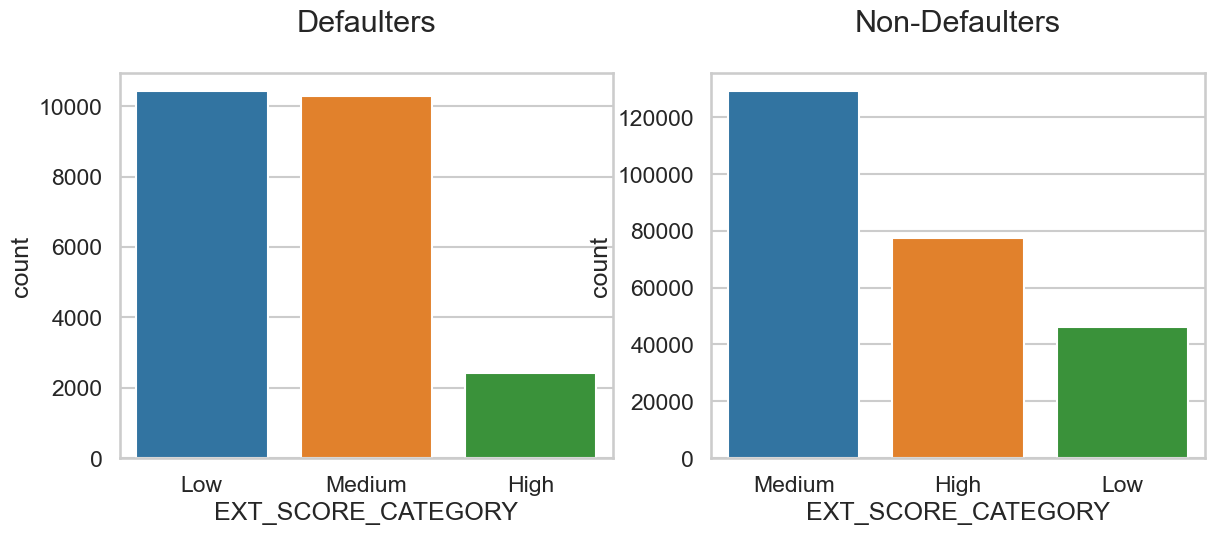

In [109]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - No surprise that low scorer from external data source are more defaulters. Also, the medium scorer are as likely defaulter as low scorer.
2. **Non defaulters** - Medium scorers are no more defaulted than High scorer. As expected the Low scorers are lesser in number.

## Bivariate analysis

#### Corelation of relevant numerical columns for defaulters and non defaulters

In [110]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']

##### Corelation of defaulters 

In [111]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_current_target_1[corr_cols]
df_corr_target_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
0           202500.0    406597.5      24700.5         351000.0   25   
26          112500.0    979992.0      27076.5         702000.0   51   
40          202500.0   1193580.0      35028.0         855000.0   47   
42          135000.0    288873.0      16258.5         238500.0   36   
81           81000.0    252000.0      14593.5         252000.0   67   

    EXT_SOURCE_SCORE  REGION_RATING_CLIENT  
0               0.20                     2  
26              0.37                     3  
40              0.31                     2  
42              0.54                     3  
81              0.37                     2

In [112]:
# Corelation matrix
df_corr_target_1.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.300536     0.379973   
AMT_CREDIT                    0.300536    1.000000     0.743835   
AMT_ANNUITY                   0.379973    0.743835     1.000000   
AMT_GOODS_PRICE               0.300847    0.978326     0.741417   
AGE                          -0.017748    0.134247     0.002475   
EXT_SOURCE_SCORE              0.032894    0.101060     0.080166   
REGION_RATING_CLIENT         -0.141908   -0.037249    -0.043304   

                      AMT_GOODS_PRICE       AGE  EXT_SOURCE_SCORE  \
AMT_INCOME_TOTAL             0.300847 -0.017748          0.032894   
AMT_CREDIT                   0.978326  0.134247          0.101060   
AMT_ANNUITY                  0.741417  0.002475          0.080166   
AMT_GOODS_PRICE              1.000000  0.135506          0.109665   
AGE                          0.135506  1.000000          0.166821   
EXT_SOURCE_SCORE             0.109665  0.166821          1.000000   
REGION_RATING_CLIENT        -0.045769 -0.035888         -0.168471   

                      REGION_RATING_CLIENT  
AMT_INCOME_TOTAL                 -0.141908  
AMT_CREDIT                       -0.037249  
AMT_ANNUITY                      -0.043304  
AMT_GOODS_PRICE                  -0.045769  
AGE                              -0.035888  
EXT_SOURCE_SCORE                 -0.168471  
REGION_RATING_CLIENT              1.000000

<Axes: >

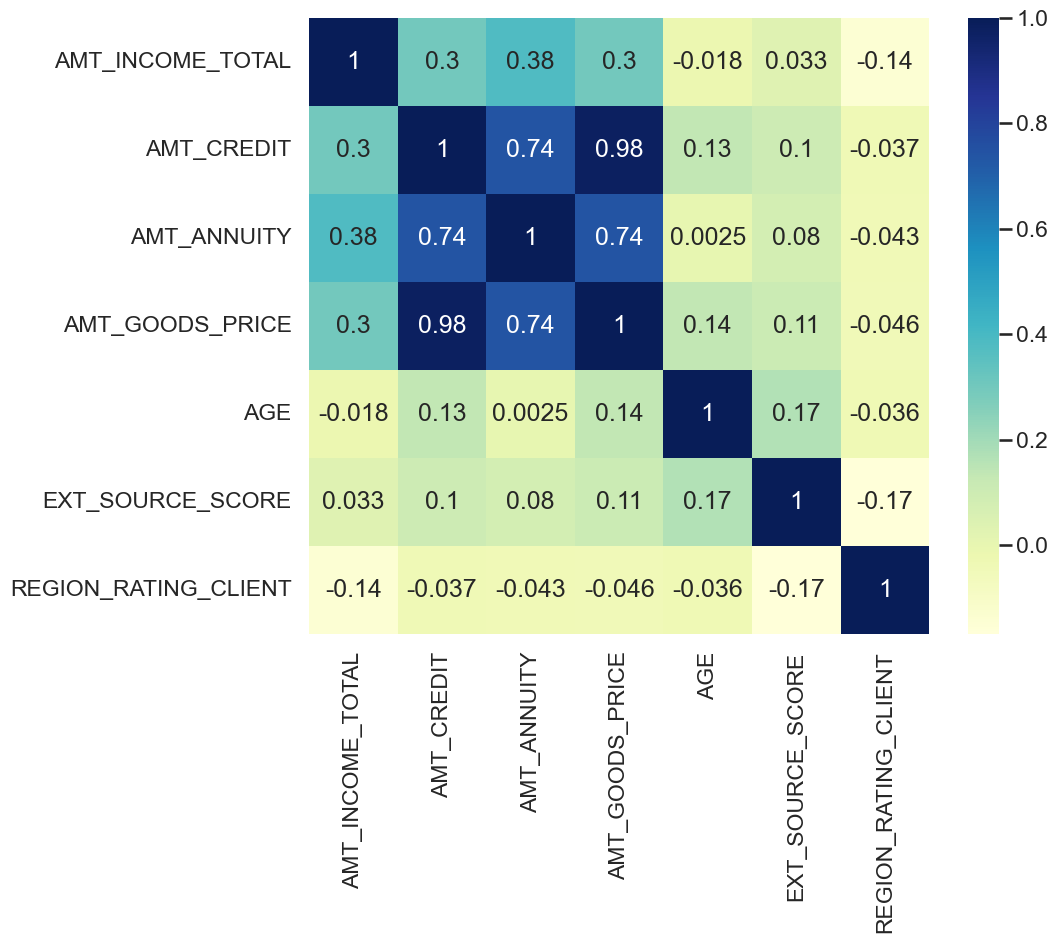

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns for defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.74)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

##### Corelation of non defaulters 

In [114]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_current_target_0[corr_cols]
df_corr_target_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
1          270000.0   1293502.5      35698.5        1129500.0   45   
2           67500.0    135000.0       6750.0         135000.0   52   
3          135000.0    312682.5      29686.5         297000.0   52   
4          121500.0    513000.0      21865.5         513000.0   54   
5           99000.0    490495.5      27517.5         454500.0   46   

   EXT_SOURCE_SCORE  REGION_RATING_CLIENT  
1              0.57                     1  
2              0.64                     2  
3              0.58                     2  
4              0.42                     2  
5              0.49                     2

In [115]:
# Corelation matrix
df_corr_target_0.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.325565     0.404481   
AMT_CREDIT                    0.325565    1.000000     0.762754   
AMT_ANNUITY                   0.404481    0.762754     1.000000   
AMT_GOODS_PRICE               0.328674    0.982241     0.762533   
AGE                          -0.100537    0.047818    -0.022884   
EXT_SOURCE_SCORE              0.042236    0.075239     0.067827   
REGION_RATING_CLIENT         -0.173483   -0.047220    -0.077641   

                      AMT_GOODS_PRICE       AGE  EXT_SOURCE_SCORE  \
AMT_INCOME_TOTAL             0.328674 -0.100537          0.042236   
AMT_CREDIT                   0.982241  0.047818          0.075239   
AMT_ANNUITY                  0.762533 -0.022884          0.067827   
AMT_GOODS_PRICE              1.000000  0.046133          0.082494   
AGE                          0.046133  1.000000          0.173140   
EXT_SOURCE_SCORE             0.082494  0.173140          1.000000   
REGION_RATING_CLIENT        -0.049072 -0.004739         -0.201091   

                      REGION_RATING_CLIENT  
AMT_INCOME_TOTAL                 -0.173483  
AMT_CREDIT                       -0.047220  
AMT_ANNUITY                      -0.077641  
AMT_GOODS_PRICE                  -0.049072  
AGE                              -0.004739  
EXT_SOURCE_SCORE                 -0.201091  
REGION_RATING_CLIENT              1.000000

<Axes: >

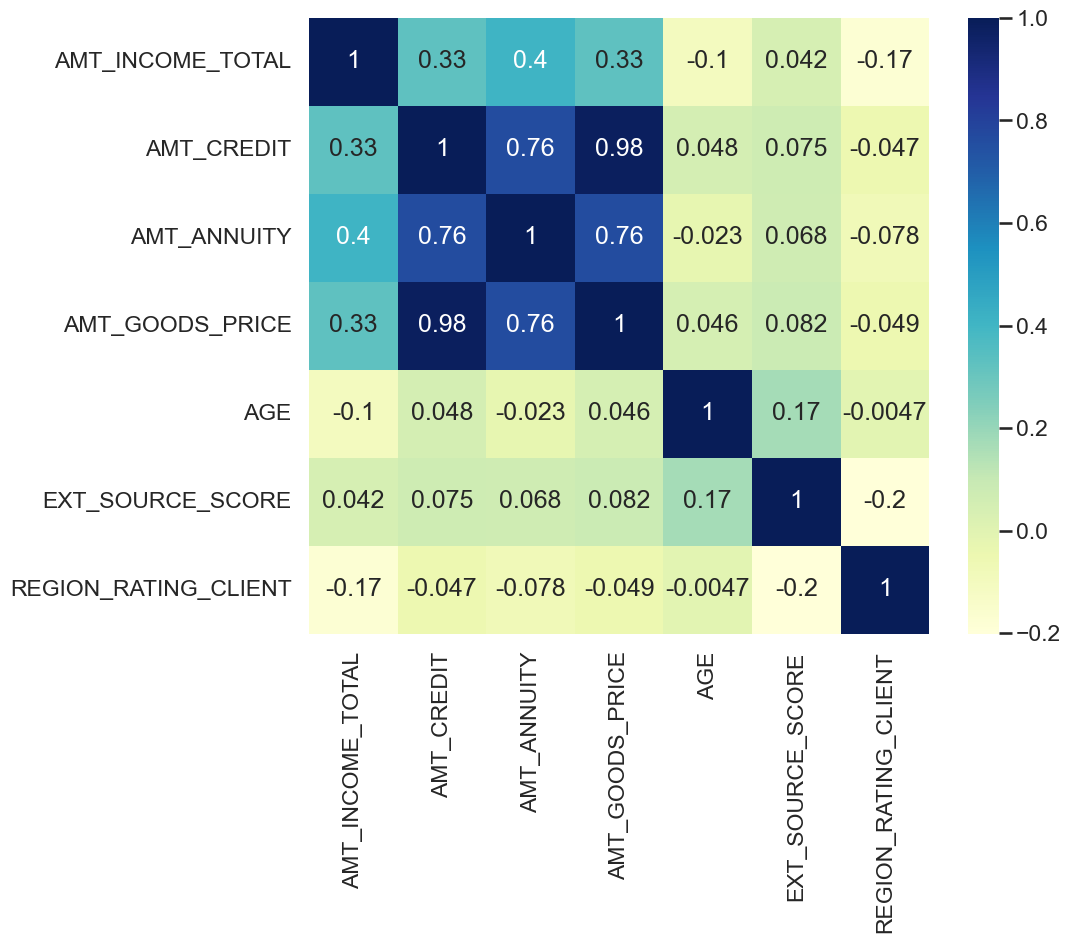

In [116]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns for non defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.76)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

**Conclusion** - 
We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.

### Bivariate analysis on continious variable

#### Credit amount of the loan on the basis of client income for both male and female

Text(0.5, 1.0, 'Non Defaulters')

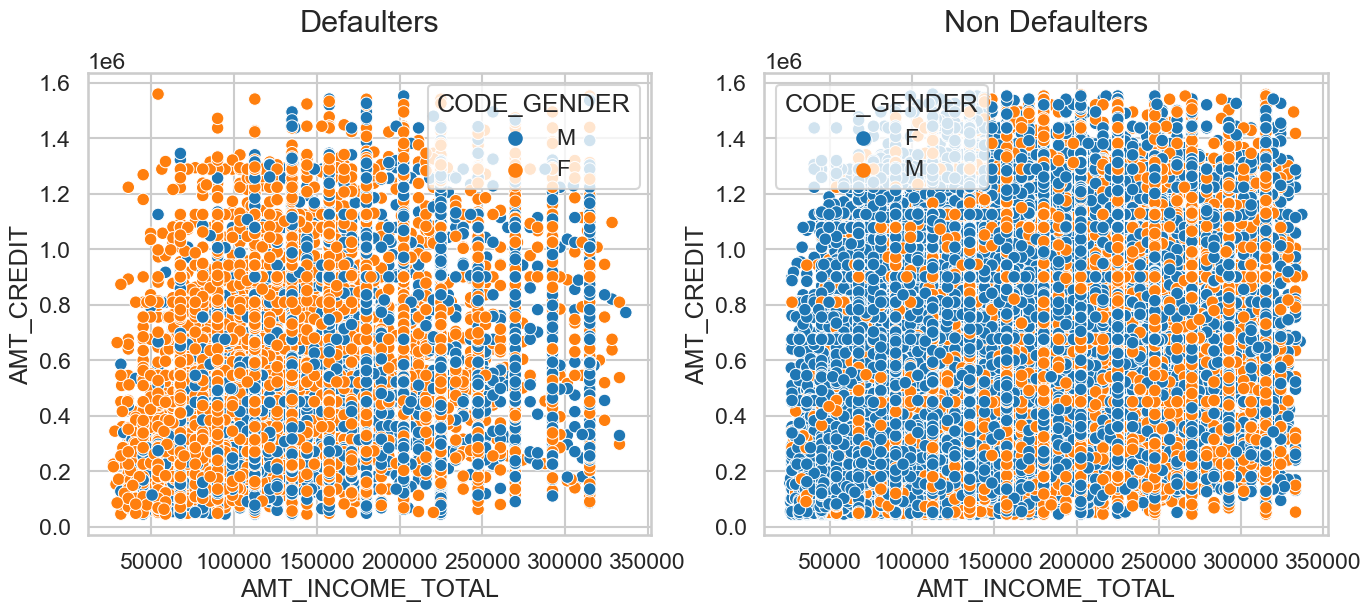

In [117]:
# Create a figure with two subplots
plt.figure(figsize=(16,6))

# Subplot 1 - Scatter plot for Defaulters
plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue='CODE_GENDER', data=df_current_target_1)
plt.title('Defaulters')

# Subplot 2 - Scatter plot for Non Defaulters
plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue = 'CODE_GENDER', data=df_current_target_0)
plt.title('Non Defaulters')

##### Analysis
1. **Defaulters** - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
2. **Non defaulters** - We can hardly figure out any pattern out of this.

#### Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client

Text(0.5, 1.0, 'Non Defaulters')

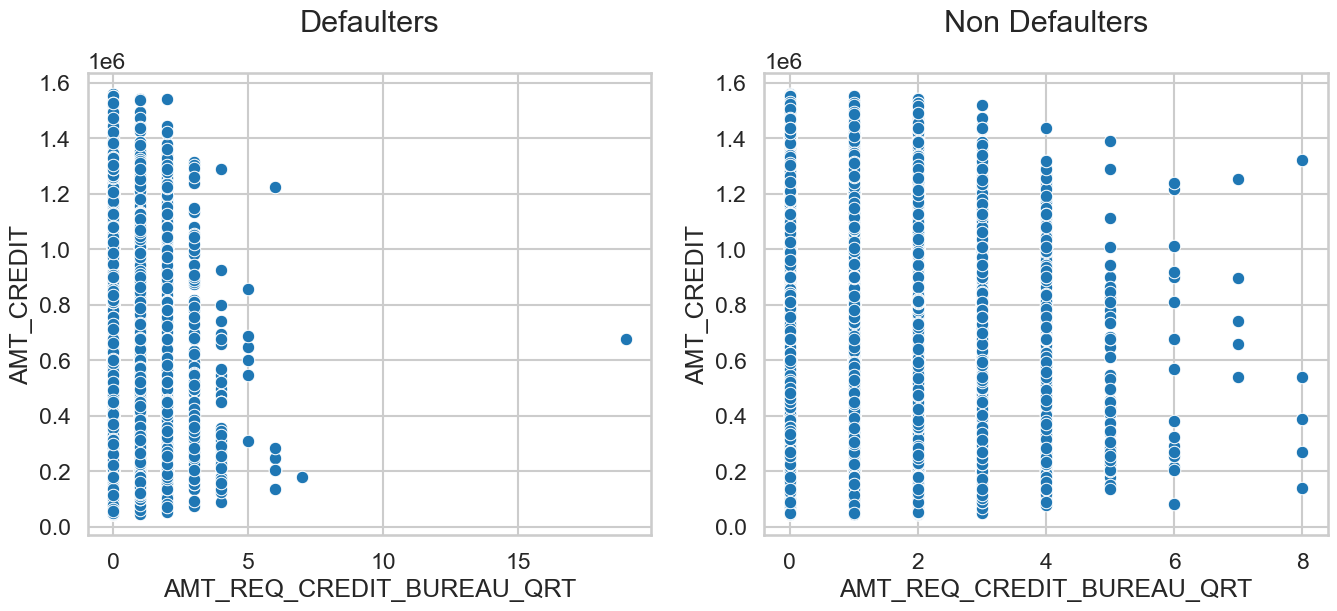

In [118]:
# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# Subplot 1 - Scatter plot for Defaulters
plt.subplot(1, 2, 1)
sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT', y='AMT_CREDIT', data=df_current_target_1)
plt.title('Defaulters')

# Subplot 2 - Scatter plot for Non Defaulters
plt.subplot(1,2,2)
sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT', y='AMT_CREDIT', data=df_current_target_0)
plt.title('Non Defaulters')

##### Analysis
We see that the more number of enquiries the lesser the amount of loan credited for both defaulters and non defaulters.

#### df_current_target_0

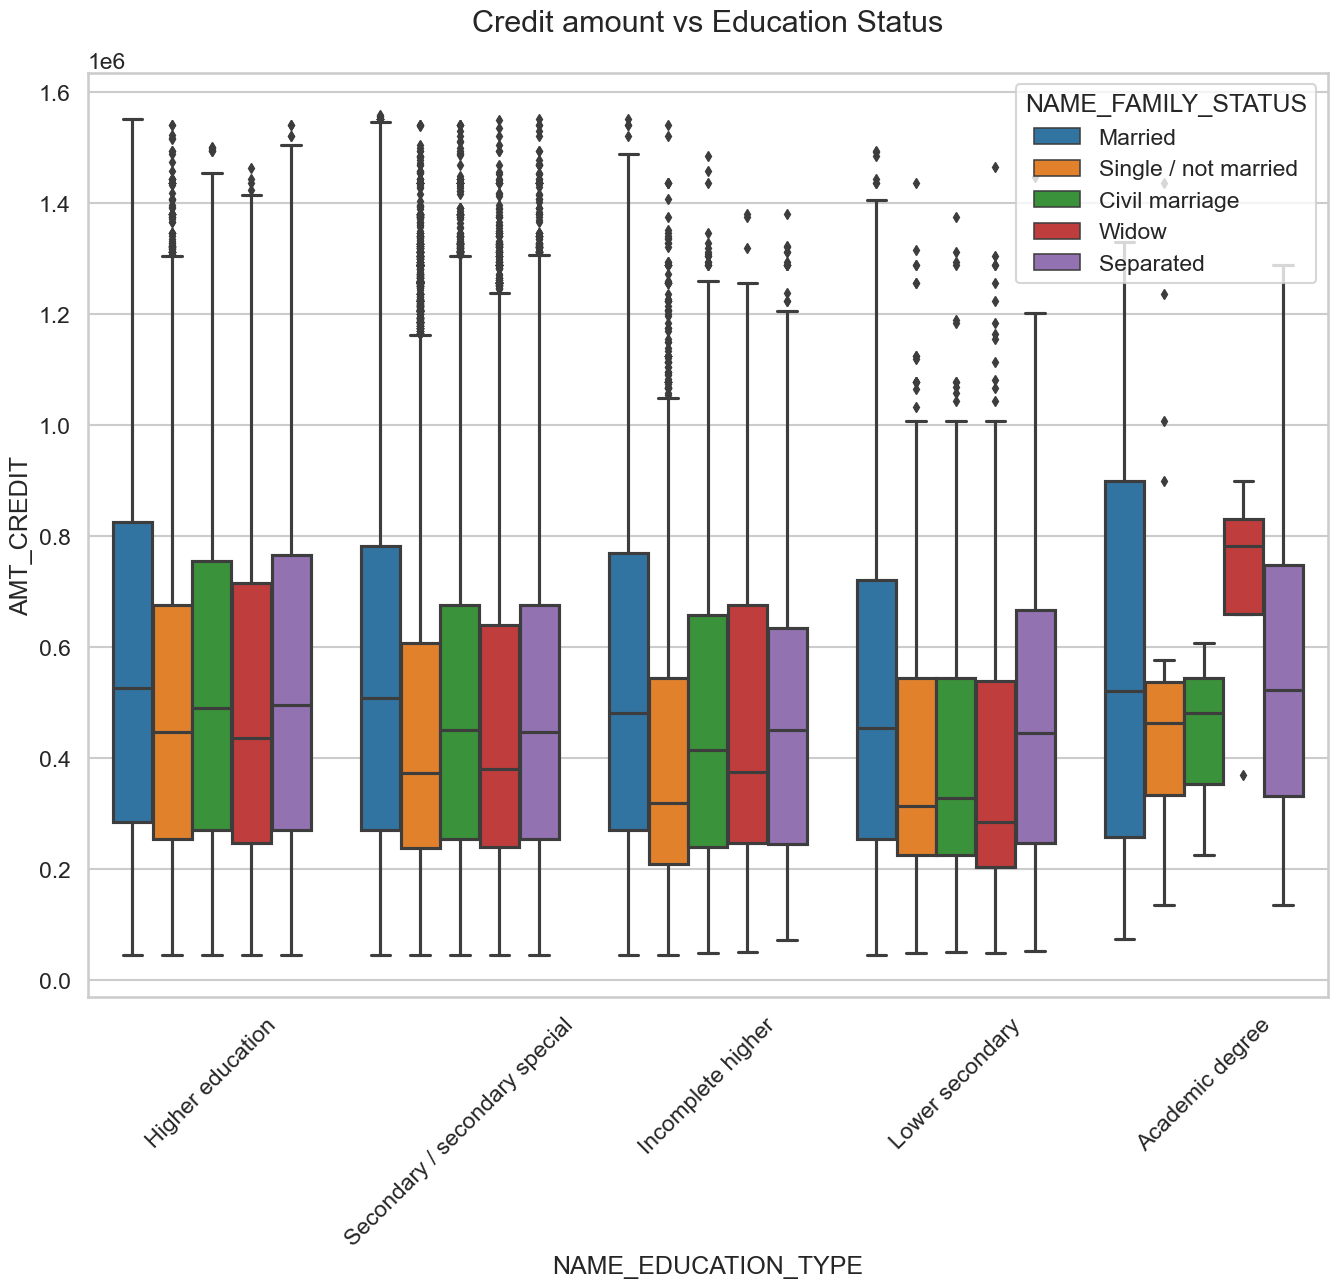

In [119]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df_current_target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

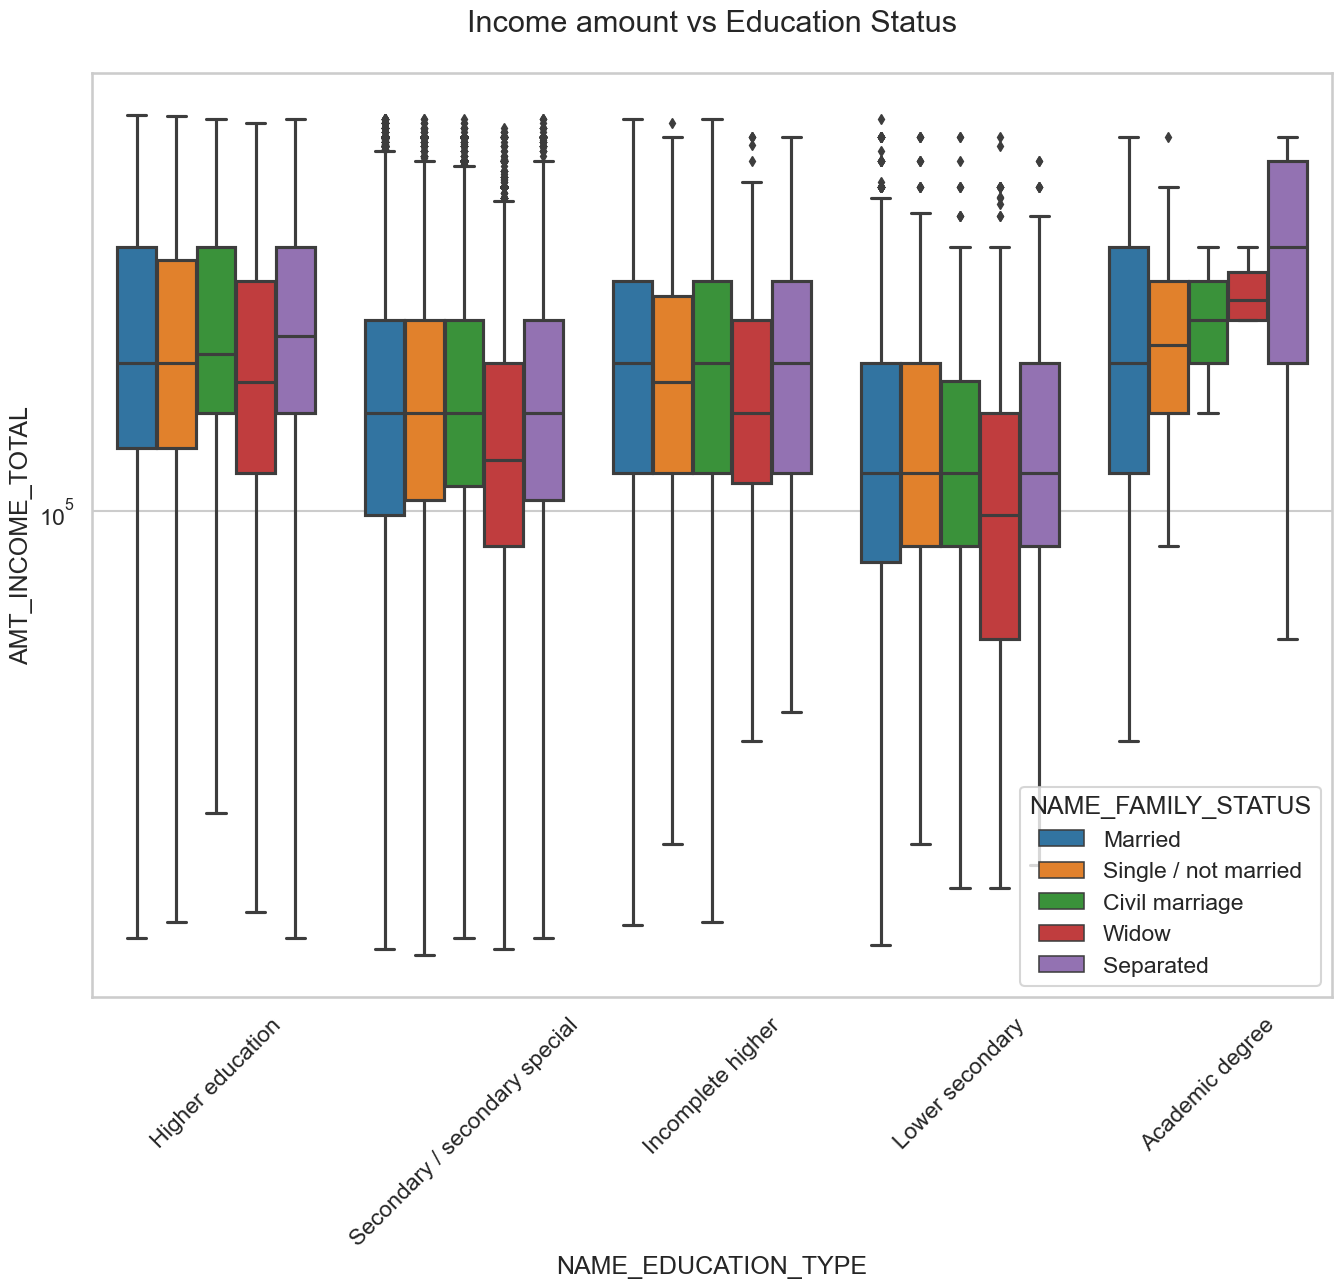

In [120]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_current_target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.Lower secondary of civil marriage family status are have less income amount than others.

#### df_current_target_1

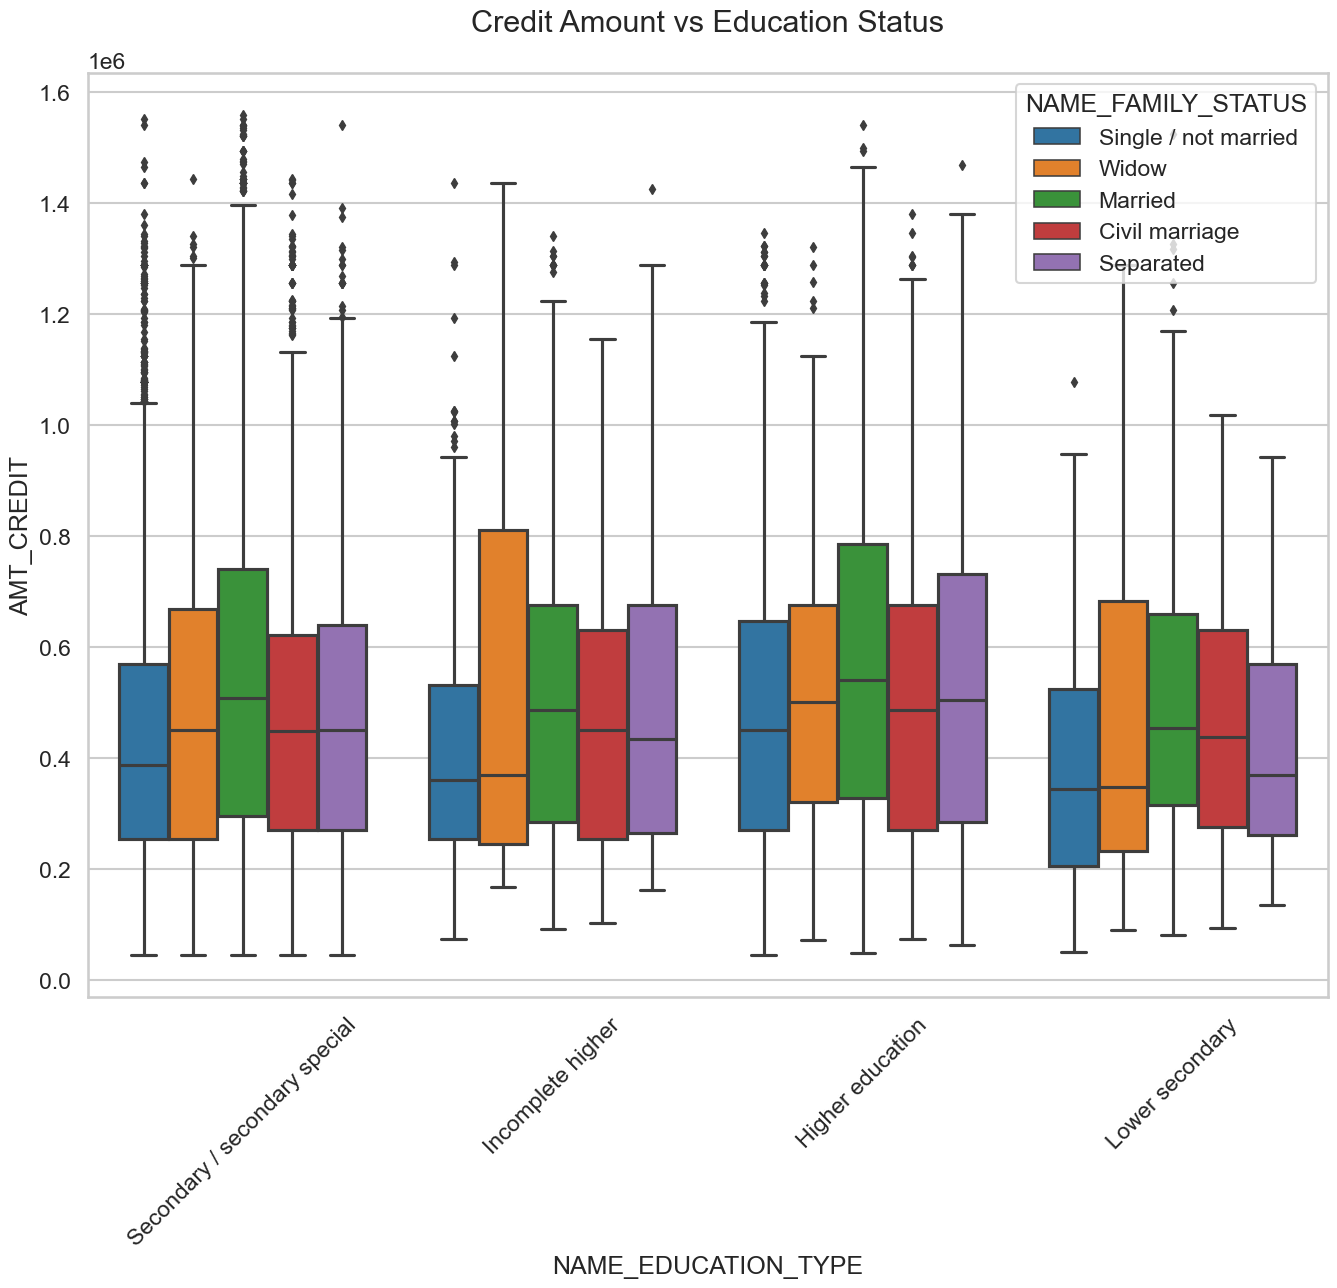

In [121]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df_current_target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

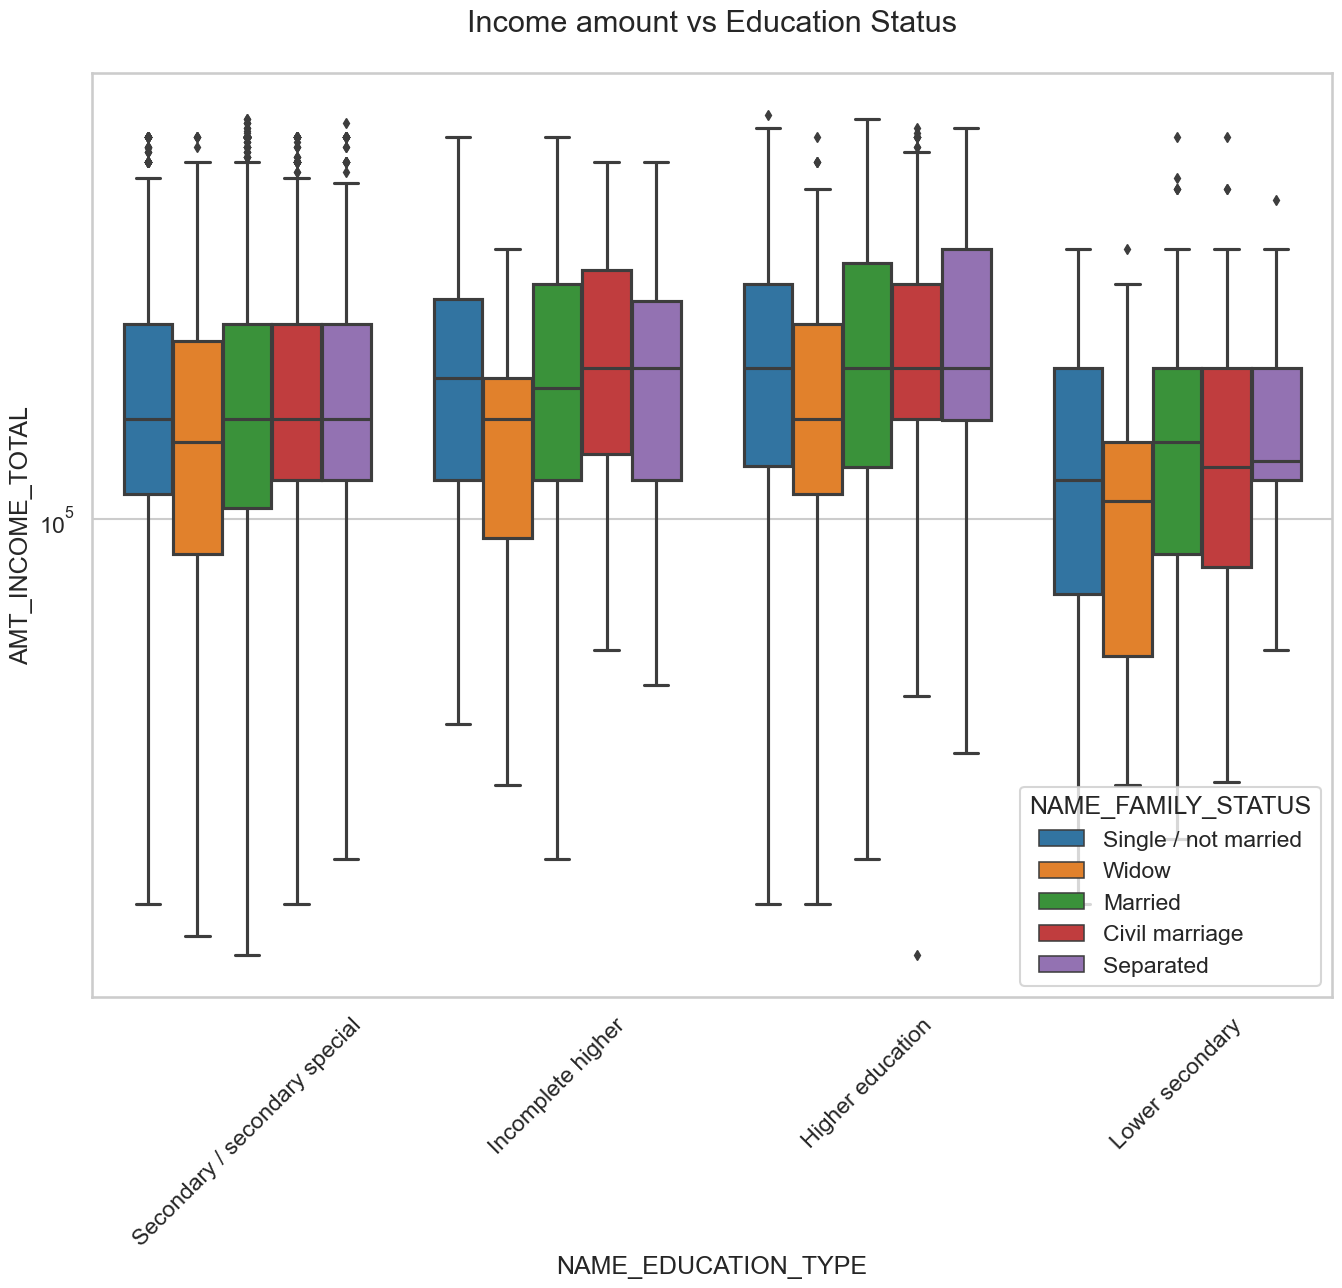

In [122]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_current_target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0,
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [123]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

#### Defaulters

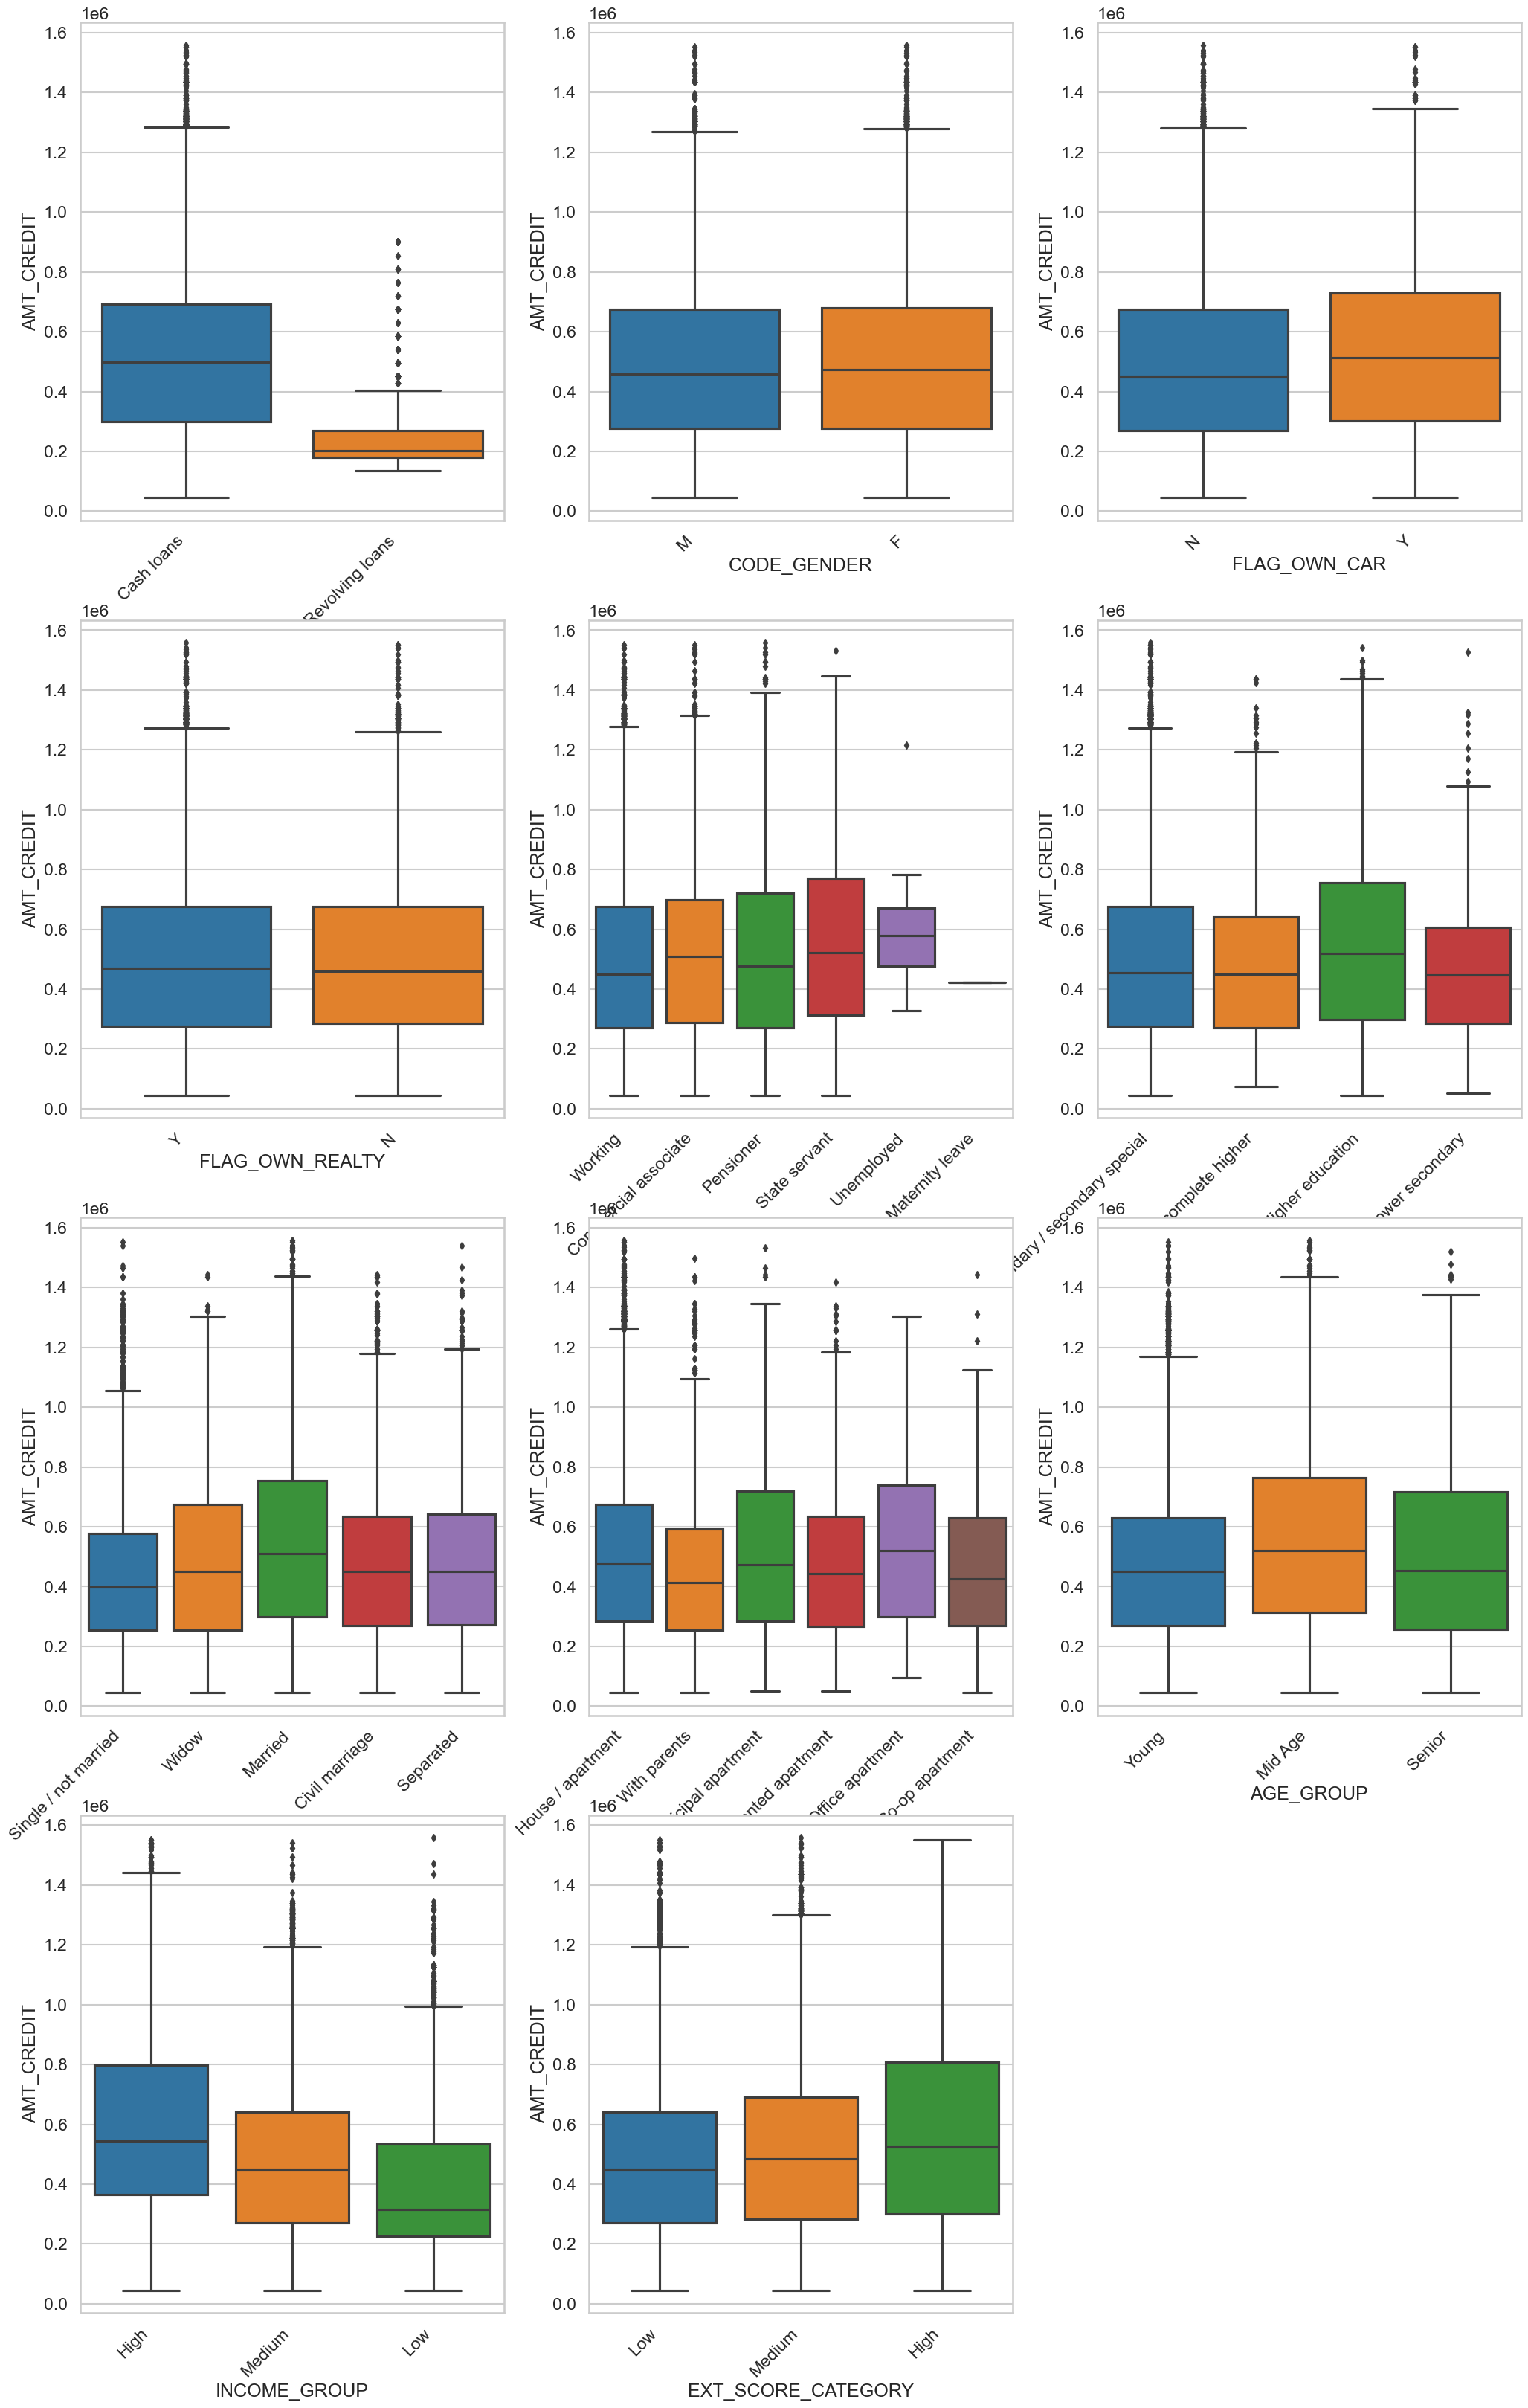

In [124]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
4. Higher income group have more loan amount credited.
5. Clients having higher external score have more loan amount.

#### Non-defaulters

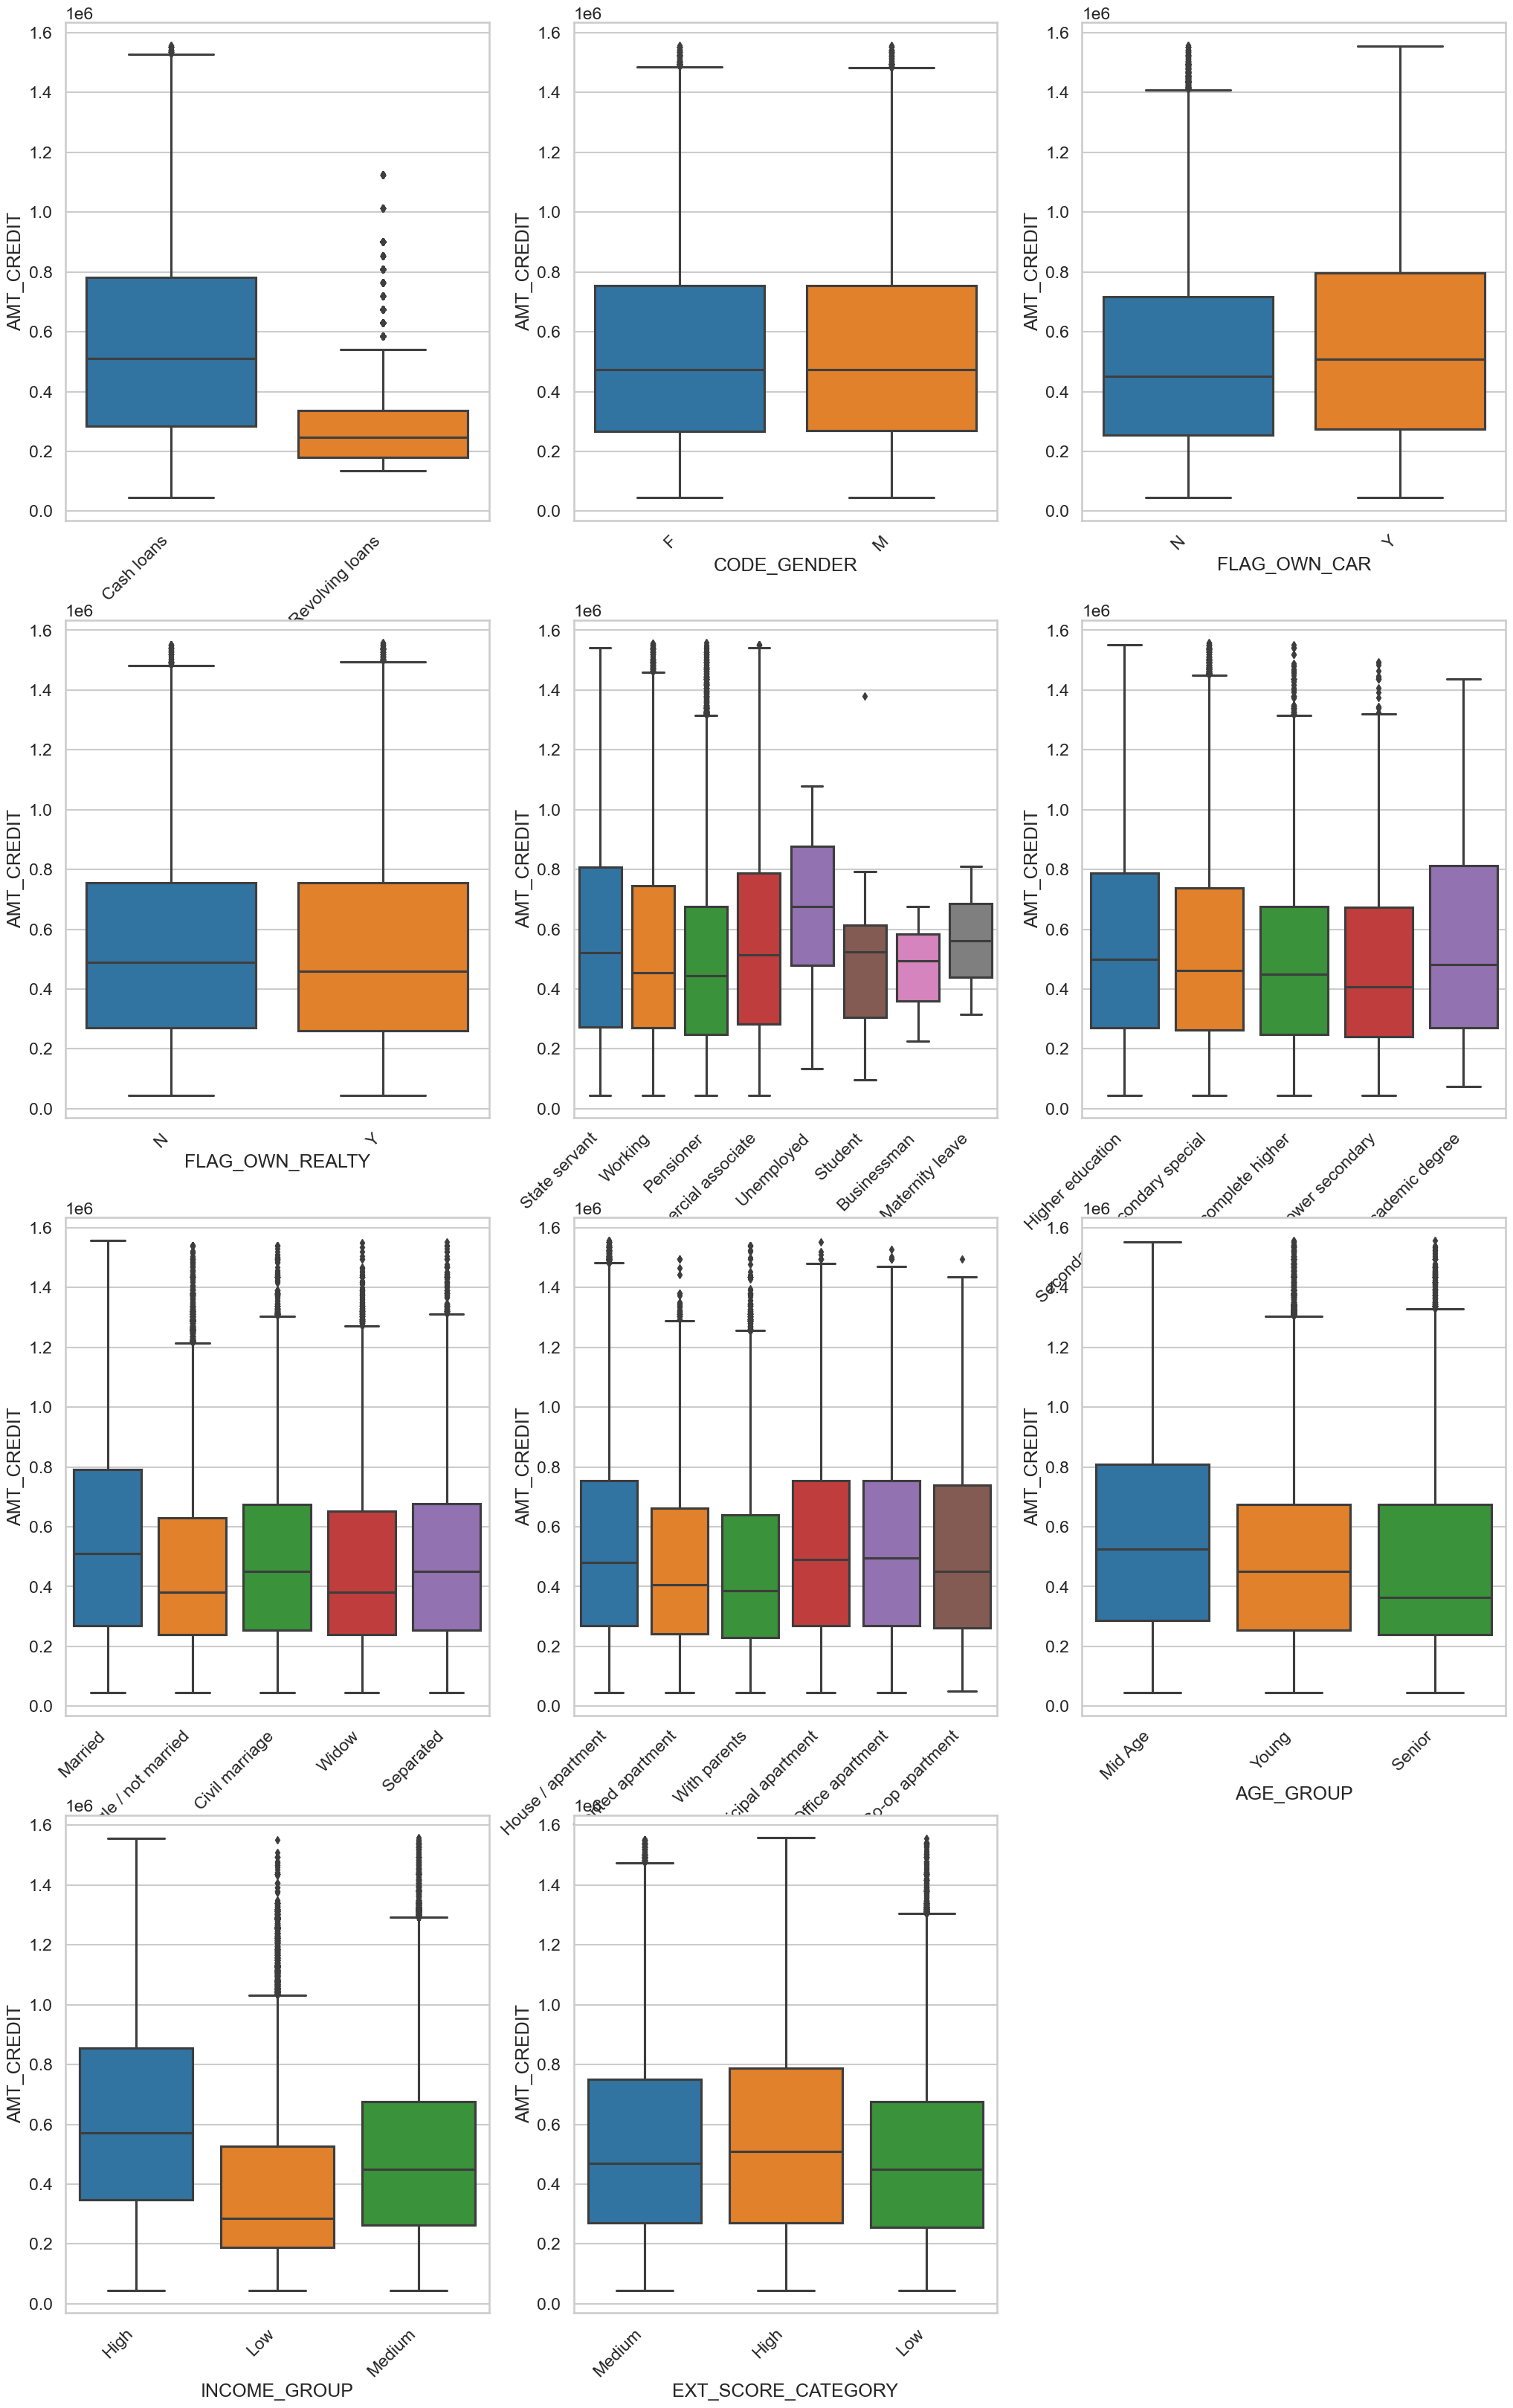

In [125]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The mid age group got more amount of loan credited cmpared to young and senior citizen.
4. Higher income group have more loan amount credited and lower the lowest.
5. Clients having higher external score have more loan amount.
6. Surprisingly the `unemployed` people have spike in credit amount of loan
7. The `Married` people have more loan amount credited.

### Anslysis of two segmented variables 

 #### Income group and gender

Text(0, 0.5, 'Defaulters')

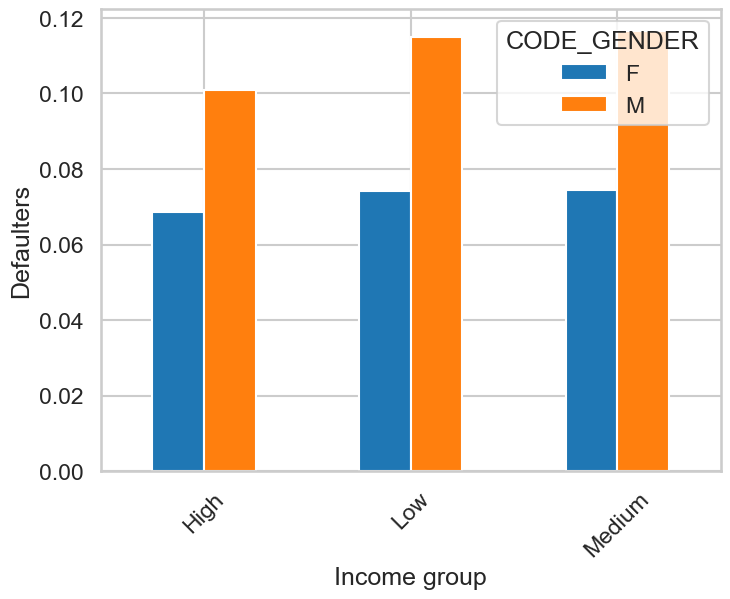

In [126]:
df_application_data.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

##### Analysis
We can see that `Males` are more likely defaulted than `Females` accross all income groups.

#### Education and gender

Text(0, 0.5, 'Defaulters')

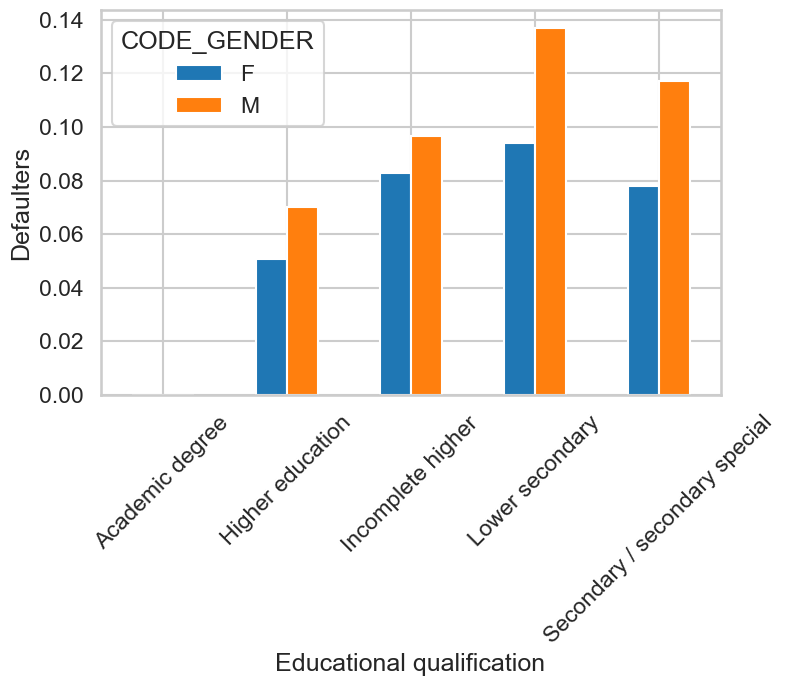

In [127]:
df_application_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

##### Analysis
1. `Lower secondary` educated clients are more defaulted followed by `Secondary` and `Incomplete higher` educated clients.
2. The `Higher` educated people are less defaulted.
3. Accross all educated level `Females` are less defaulted than male.

 #### Credit amount group and Income group

Text(0, 0.5, 'Defaulters')

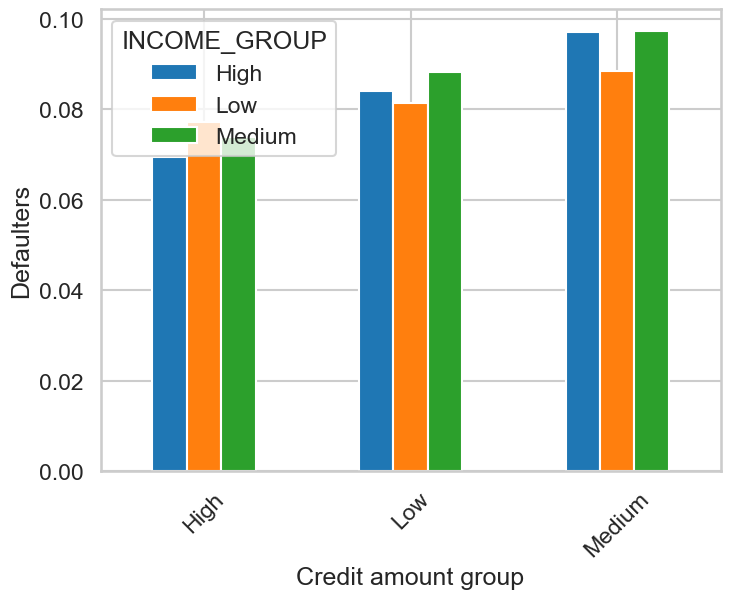

In [128]:
df_application_data.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

##### Analysis
1. Medium credit amount group are highly defaulted in all income groups.
2. High credit amount groups are less likely to default in all income groups.

#### Credit amount group and Age group

Text(0, 0.5, 'Defaulters')

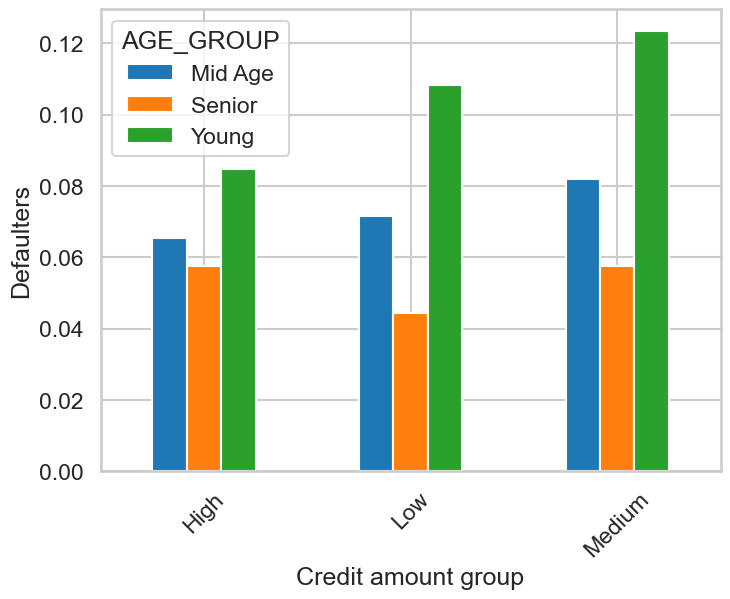

In [129]:
df_application_data.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

##### Analysis
1. Young clients with medium and low credit amount group are highly defaulted.
2. Senior citizens across all credit amount groups are less likely defaulted.

#### Age group and Income group

Text(0, 0.5, 'Defaulters')

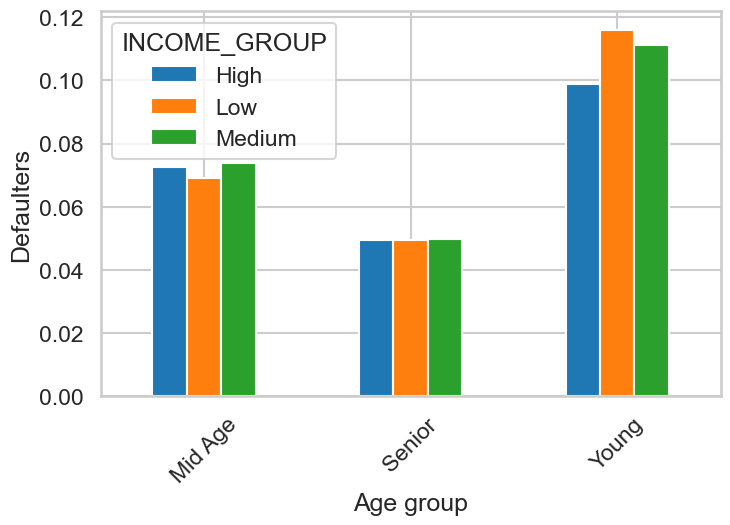

In [130]:
df_application_data.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')

##### Analysis
1. `Young` clients are more defaulted than Mid age and senior.
2. Young low income people are more defaulted.
3. For Mid age and senior people the default rate is almost same in all income group.

#### Profession and Gender

Text(0, 0.5, 'Defaulters')

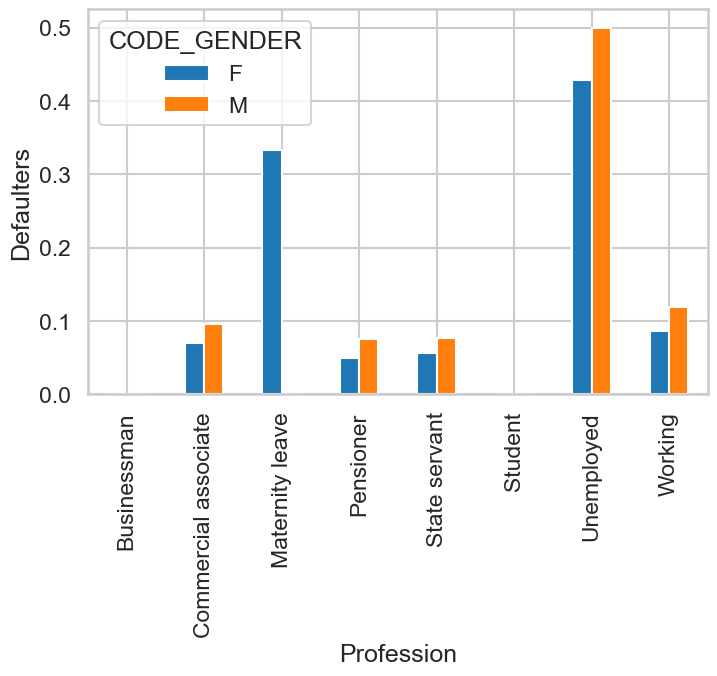

In [131]:
df_application_data.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

##### Analysis
1. No surprise the unemployed clients are more defaulted.
2. Clients with maternity leave are expected to be defaulted more.
3. The default rate is lesser in all other professions.
4. Males are more defaulted with their respective professions compared to females.

#### Family status and age group

Text(0, 0.5, 'Defaulters')

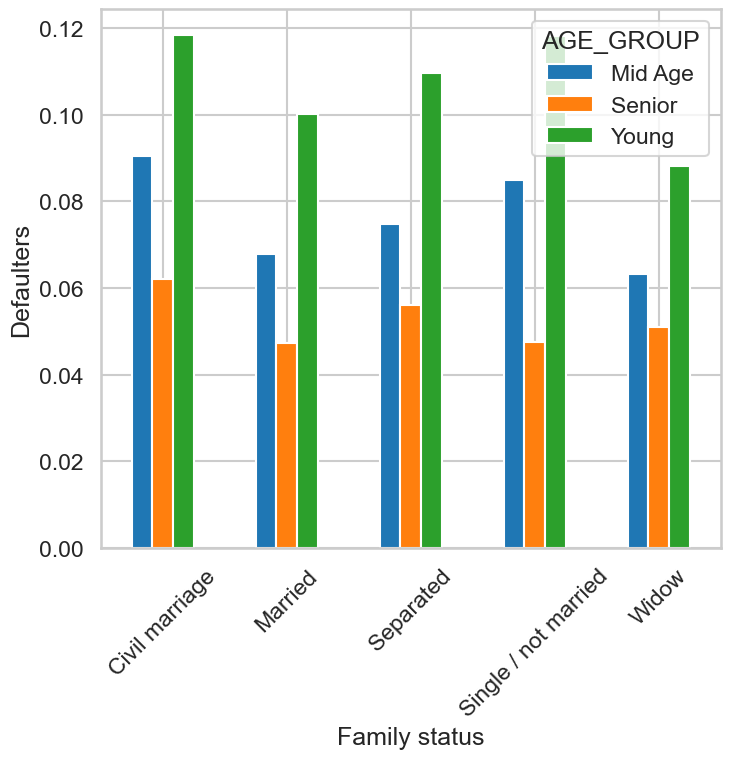

In [132]:
df_application_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

##### Analysis
Across all family status the `Young` clients are more defaulted and `Senior citizen` are less.

#### Family status and gender

Text(0, 0.5, 'Defaulters')

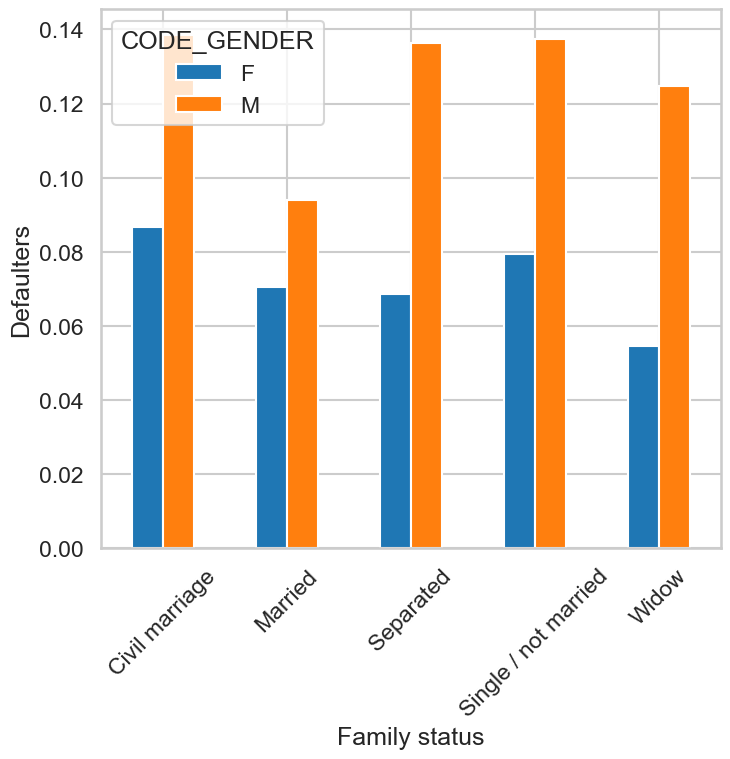

In [133]:
df_application_data.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

##### Analysis
Across all family status the `Male` clients are more defaulted than `Female`.

# Previous application

In [134]:
df_application_previous = pd.read_csv('previous_application.csv')
df_application_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [135]:
df_application_previous.shape

(1670214, 37)

In [136]:
df_application_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [137]:
df_application_previous.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [138]:
df_application_data.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0               Working   
307507      12001.5         225000.0             Pensioner   
307508      29979.0         585000.0               Working   
307509      20205.0         319500.0  Commercial associate   
307510      49117.5         675000.0  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
307506                    0.032561             8456.0             1982   
307507                    0.025164             4388.0             4090   
307508                    0.005002             6737.0             5150   
307509                    0.005313             2562.0              931   
307510                    0.046220             5128.0              410   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
307506           1               1                0                 1   
307507           1               0                0                 1   
307508           1               1                0                 1   
307509           1               1                0                 1   
307510           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0           0              1.0                     1   
307507           1           0              1.0                     2   
307508           0           1              1.0                     3   
307509           0           0              2.0                     2   
307510           1           0              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506                       15                           0   
307507                        8                           0   
307508                        9                           0   
307509                        9                           0   
307510                       20                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
307506                           0                            0   
307507                           0                           

In [139]:
list(df_application_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AGE',
 'YEARS_EMPLOYED',
 'AGE_GROUP',
 'CREDIT_GROUP',
 'INCOME_GROUP',
 'EXT_SOURCE_SCORE',
 'EXT_SCORE_CATEGORY']

#### Handaling missing values in columns

**Replacing all the XNA and XAP to np.null**
Because looks like these values entered in the application as blank or may be not applicable.

In [140]:
df_application_previous.replace('XNA',np.nan,inplace=True)
df_application_previous.replace('XAP',np.nan,inplace=True)

In [141]:
# List the columns having more than 50% missing values
cols_50_percent_missing_values = (df_application_previous.columns[(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)), 2)) >= 50]).tolist()
cols_50_percent_missing_values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'CODE_REJECT_REASON',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY']

In [142]:
# Delete the columns having more than 50% missing values
df_application_previous = df_application_previous.drop(cols_50_percent_missing_values,axis=1)

##### List and delete the columns, which are not much relevant for the analysis

In [143]:
df_application_previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [144]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [145]:
# Delete the columns which are irrelevant for the analysis
df_application_previous = df_application_previous.drop(cols_irrelevant,axis=1)

In [146]:
df_application_previous.shape

(1670214, 24)

#### Treating Missing Values in Rows

In [147]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(df_application_previous[df_application_previous.isnull().sum(axis=1) > (len(df_application_previous.columns)//2)].index)

333832

In [148]:
# Percent of missing values in columns
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.02
AMT_ANNUITY                  22.29
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
AMT_GOODS_PRICE              23.08
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE            37.56
NAME_TYPE_SUITE              49.12
NAME_CLIENT_TYPE              0.12
NAME_PORTFOLIO               22.29
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
CNT_PAYMENT                  22.29
NAME_YIELD_GROUP             30.97
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [149]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(df_application_previous[np.isnan(df_application_previous['AMT_ANNUITY']) & np.isnan(df_application_previous['CNT_PAYMENT']) & np.isnan(df_application_previous['AMT_GOODS_PRICE'])])

333855

In [150]:
As there are only 333855 such records we can delete those.
Note:- As we have total 1670214 records deleting only 333855 records will not much affect our further analysis.
It is better to delete such rows instead of imputing values and making the analysis biased.

SyntaxError: invalid syntax (2808124264.py, line 1)

In [ ]:
df_application_previous = df_application_previous[(~(np.isnan(df_application_previous['AMT_ANNUITY']) & np.isnan(df_application_previous['AMT_GOODS_PRICE']) & np.isnan(df_application_previous['CNT_PAYMENT'])))]

In [ ]:
df_application_previous.shape

In [ ]:
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

In [ ]:
# Count the rows for which AMT_ANNUITY is empty
len(df_application_previous[np.isnan(df_application_previous['AMT_ANNUITY'])])

In [ ]:
# As there are only 38380 rows we can delte those records
df_application_previous = df_application_previous[~(np.isnan(df_application_previous['AMT_ANNUITY']))]

In [ ]:
df_application_previous.shape

In [ ]:
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

In [ ]:
df_application_previous.shape

In [ ]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in col_list_outlier: 
    q1 = df_application_previous[col].quantile(0.25)
    q3 = df_application_previous[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_prev = df_application_previous.loc[(df_application_previous[col] > range_low) & (df_application_previous[col] < range_high)]

df_application_prev.shape

In [ ]:
# Percentage of rows lost
round((100 - 100*(len(df_application_prev.index)/1670214)),2)

In [ ]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = df_application_prev )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

We can see that there is data imbalance in below columns:-
1. NAME_CONTRACT_TYPE - There are veru few `Revolving Loans`
2. NAME_CONTRACT_STATUS - There are very few `Refused` loans. Almost negligible `Canceled` loans.
3. NAME_CLIENT_TYPE - There are very few `New` applicant. Even fewer `Refreshed` applicants.
4. NAME_PORTFOLIO - Very few application for Cards and Cars
5. CHANNEL_TYPE - Except `Country-Wide`, `Credit and Cash offices` and `Stone` all other channels are very few in muber.

#### Converting `DAYS_DECISION` column into `MONTH_DECISION` column for readablity and analysis

In [ ]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
df_application_prev['MONTH_DECISION'] = abs(df_application_prev['DAYS_DECISION']//50)

In [ ]:
# Drop 'DAYS_DECISION' column
df_application_prev = df_application_prev.drop(['DAYS_DECISION'],axis=1)

In [ ]:
df_application_prev.head()

In [ ]:
df_application_prev.shape

### Merging Current application and Previous application dataset

In [ ]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

In [ ]:
# Creating a dataset from current application for merging 
df_current_to_merge = df_application_data[cols_current]
df_current_to_merge.head()

In [ ]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [ ]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = df_application_prev.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

In [ ]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

In [ ]:
df_merged.shape

In [ ]:
len(df_merged[np.isnan(df_merged['TARGET'])])

We can see that there are NaN values in the current application columns in the merged datasets. Because few `SK_ID_CURR` are present in the previous application dataset, but those IDs are not present in the current application dataset.

In [ ]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]         

In [ ]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [ ]:
df_merged.head()

In [ ]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

### Univariate analysis on unordered categorical variable

#### Previous Loan status

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Loan status')


##### Analysis
There are huge number of `Approved` loan than `Refused`. Hardly, there are any `Canceled` or `Unused offer` loan.

#### Client type

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')

##### Analysis
Mostly the applicants were `Repeater`

#### Portfolio of the previous applications

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')

##### Analysis
The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.

#### Application channel type

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

##### Analysis
We see that `Country-wide` was heavily used for previous applications followed by `Credit and Cash offices`, `Stone` and `Regional`. Rest other channels are hardly used. 

### Univariate analysis for continious variables

#### Applied loan amount

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

##### Analysis
Most of the applications were for the amount of below 250000 as we see from the above distribution.

#### Credited loan amount

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')

##### Analysis
The distribution of the credited amount of the loan was mostly in 250000 range.

#### Months took for the pervious application decision relative to the current application 

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')

##### Analysis
We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

## Bivariate analysis

In [ ]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [ ]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

In [ ]:
# Corelation matrix
df_merged_corr.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns**
1. AMT_APPLICATION and AMT_CREDIT
2. AMT_APPLICATION and AMT_ANNUITY	
3. AMT_CREDIT and AMT_ANNUITY

**Moderately corelated columns**
1. AMT_APPLICATION and CNT_PAYMENT
2. AMT_CREDIT and CNT_PAYMENT

### Bivariate analysis on continious variable

#### Application amount and credited amount

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)

##### Analysis
We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

#### Application amount and the month taken to take decision related to current application

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_APPLICATION',y='MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)

##### Analysis
We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application. 

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [ ]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

In [ ]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. `Cash loans` are more credited in amount than Revolving and Consumer loans.
2. `Repeater` clients get more amount loan than new and refreshed clients.
3. The loan with portfolio `Cars` are more amount credited followed by `Cash`.
4. The credit amount of the loan is more from the application channel type as `car dealer` followed by `Channel of corporate sales`, `Credit and cash offices` and `Contact center`. The amount is very less for `Regional`, `Stone` and `Country-wide` channels.

#### Anslysis of two segmented variables

#### Status and Client type

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )

##### Analysis
We see that the `Repeater` clients have more approved loans than `New` and `Refreshed` clients.

#### Current loan defaulter status with respect to previous loan application status

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
We see that previously `Refused` client is more defaulted than previously `Approved` clients. Also, in all the cases the `Males` are more defaulted than `Females`.

#### Current loan defaulter status with respect to previous loan application status and client types

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. We can see that the `Defaulters` are more for previously `Unused offers` loan status clients, who were `New`.
2. For previously `Approved` status the `New` clients were more defaulted followed by `Repeater`.
3. For previously `Refused` applicants the `Defaulters` are more `Refreshed` clients.
4. For previously `Canceled` applicants the `Defaulters` are more `New` clients.

#### Current loan defaulter status with respect to previous loan application status and age group

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. For all the previous status `Young` applicants are more defaulted.
2. For all the previous status `Senior` applicants are less defaulted compared to others.

#### Current loan defaulter status with respect to previous loan application status and income group

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. For previously `Unused` offer the `Medium` income group was more defaulted and `Low` income group is the least.
2. For other application status more or less all the income groups are equally defaulted. 

#### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. Most of the clients were defaulted, who previously applied loan for `Cards`.
2. For approved loan status the clients applied for `Cars` are less defaulted.
3. For `Refused` loan status the clients applied for `POS` are less defaulted.

#### Current loan defaulter status with respect to previous loan application status and external source score category

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. Applicants with low external source score are highly defaulted.
2. Higher scorer applicants are very ulikely to default irrespective of their previous loan status.